# **Unraveling Phishing Websites using Classification Models**

## **Problem Definition**
This analysis aims to examine the Phishing Websites dataset and apply pertinent Data Mining algorithms to identify the most effective attributes for classifying the website instances as phishing or legitimate. The intention is to seek information such as whether features such as IP address instead of the domain name in URL, inclusion of valid TLS or SSL certificate, whether URLs are indexed on Google, whether Top-level domain is a commonly used one, etc. have any impact on a particular instance being classified as legitimate or phishing. 


## **Data Sources**
The Phishing Websites dataset has been taken from Mendeley Data, an open-source, secure online repository for Research Data (https://data.mendeley.com/datasets/72ptz43s9v/1). 
The data description is from the Publication: 

[1] Grega Vrbančič, Iztok Fister, Vili Podgorelec, Datasets for phishing websites detection, https://doi.org/10.1016/j.dib.2020.106438.

## **Data Description**
This dataset comprises a total of 88,647 instances. There are a total of 111 attributes in both the dataset and 1 target atribute - `phishing`, which indicates if the instance is a legitimate (0) or a phishing (1) website.

The URL string considers the `Domain, Directory, File and Parameters` as substrings. The attributes have been been sub-categorized into six groups based on the following properties: 
* Attributes based on whole URL properties
* Attributes based on Domain URL 
* Attributes based on URL directory 
* Dataset attributes based on URL file name
* Dataset attributes based on URL parameters
* Dataset attributes based on resolving URL and external services

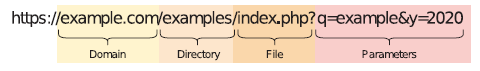

**Creating a mount point in Google drive for reading files into google colab directly**

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive



## **Data Understanding**




**Importing the packages required for analysis**




In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency 
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import *
import graphviz 
from tabulate import tabulate
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings("ignore") 

In [3]:
# Reading the dataset and storing it in a separate dataframe
df_phishing  = pd.read_csv('/content/drive/My Drive/IE7275_Data_Mining_in_Engineering/Project_Files/phishing_website_dataset_full.csv')

In [4]:
# Setting the maximum number of rows displayed to 500
pd.set_option('display.max_rows', 500)

Finding the dimensions of the dataset before further analysis

In [5]:
# Checking the dimensions of the dataset  
print("Dimensions of the dataset :",df_phishing.shape)

# Reading the first five observations of the dataset 
df_phishing.head()

Dimensions of the dataset : (88647, 112)


,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,...,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,17,0,0,...,0,0,0,7,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.207316,0,60781,-1,-1,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,0,0,0,0,0,0,0,3,223,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,16,0,0,...,0,0,0,9,0,0,1,0,0,3,0,2,0,0,0,0,0,0,0,0,0,165,0,3,0,0.499566,-1,36024,579,150,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,14,0,0,...,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.935901,0,4766,-1,-1,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,81,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,19,0,0,...,0,0,0,9,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.410021,0,20454,-1,-1,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,19,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,19,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.410761,0,53831,6998,306,1,2,1,3597,0,1,0,0,0,0


From the below results, we observe that each of the attributes of this dataset are numeric in nature. The categorical variables are binary in nature, and therefore Python identifies them as numeric. 

In [6]:
# Analyzing the datatypes of each attribute of the dataset
df_phishing.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88647 entries, 0 to 88646
Data columns (total 112 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   qty_dot_url                 88647 non-null  int64  
 1   qty_hyphen_url              88647 non-null  int64  
 2   qty_underline_url           88647 non-null  int64  
 3   qty_slash_url               88647 non-null  int64  
 4   qty_questionmark_url        88647 non-null  int64  
 5   qty_equal_url               88647 non-null  int64  
 6   qty_at_url                  88647 non-null  int64  
 7   qty_and_url                 88647 non-null  int64  
 8   qty_exclamation_url         88647 non-null  int64  
 9   qty_space_url               88647 non-null  int64  
 10  qty_tilde_url               88647 non-null  int64  
 11  qty_comma_url               88647 non-null  int64  
 12  qty_plus_url                88647 non-null  int64  
 13  qty_asterisk_url            88

In [7]:
# Checking the count of values of the different classes of the target variable 'phishing'
df_phishing.phishing.value_counts()

0    58000
1    30647
Name: phishing, dtype: int64

From the below visualization, we observe that there are 30,647 instances labeled as phishing and 58,000 instances labeled as legitimate for the target variable `phishing`. This demonstrates that this is an imbalanced dataset, as there are more legitimate instances than phishing instances. 

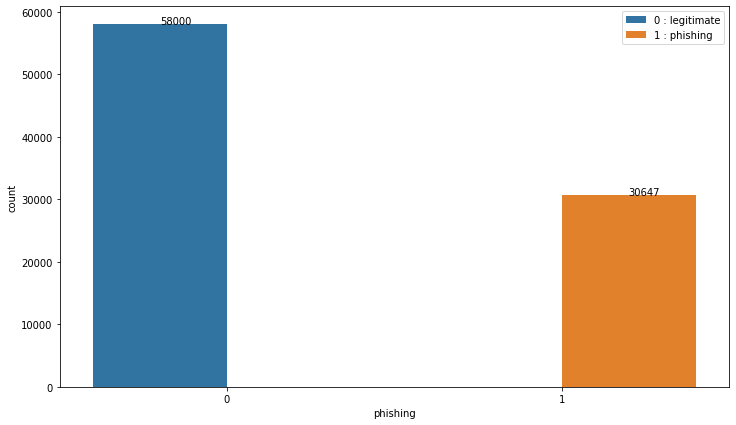

In [8]:
# Visualizing the count of classes of the target variable 'phishing' using a countplot

plt.figure(figsize=(12,7))
count = sns.countplot(data=df_phishing, x="phishing", hue="phishing")


for p in count.patches:
        count.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+100))

plt.legend(labels=["0 : legitimate","1 : phishing"])

From the below summary statistics, we observe that a few attributes have maximum value `0` and minimum value `-1`, which is an indication that such variables do not contain any records because quantitative values cannot be negative. Therefore, such attributes can be dropped as part of the data pre-processing step.

In [9]:
# Checking the summary statistics 
df_phishing.describe().T

,count,mean,std,min,25%,50%,75%,max
qty_dot_url,88647.0,2.191343,1.235636,1.0,2.000000,2.000000,2.000000,24.000000
qty_hyphen_url,88647.0,0.328810,1.119286,0.0,0.000000,0.000000,0.000000,35.000000
qty_underline_url,88647.0,0.113879,0.657767,0.0,0.000000,0.000000,0.000000,21.000000
qty_slash_url,88647.0,1.281781,1.893929,0.0,0.000000,0.000000,2.000000,44.000000
qty_questionmark_url,88647.0,0.009329,0.112568,0.0,0.000000,0.000000,0.000000,9.000000
qty_equal_url,88647.0,0.205861,0.954272,0.0,0.000000,0.000000,0.000000,23.000000
qty_at_url,88647.0,0.022133,0.279652,0.0,0.000000,0.000000,0.000000,43.000000
qty_and_url,88647.0,0.140885,0.924864,0.0,0.000000,0.000000,0.000000,26.000000
qty_exclamation_url,88647.0,0.002944,0.087341,0.0,0.000000,0.000000,0.000000,10.000000
qty_space_url,88647.0,0.001015,0.072653,0.0,0.000000,0.000000,0.000000,9.000000


### **Data Pre-processing**

In [10]:
# Autonomous System Number(ASN) is a global unique identifier for each network on the Internet. Since it is a unique id, we can drop this attribute. 

df_phishing.drop('asn_ip', axis=1, inplace=True)

Dropping the few attributes having a maximum value `0`, which is an indication that such variables do not contain any records.

In [11]:
# Checking the attributes that have maximum value '0' 
max_value_zero = (df_phishing.max() == 0)
drop_features = max_value_zero[max_value_zero == True].index
print("Dropping the features which have maximum value 0:\n", drop_features)
df_phishing.drop(drop_features, axis=1, inplace=True)

Dropping the features which have maximum value 0:
 Index(['qty_slash_domain', 'qty_questionmark_domain', 'qty_equal_domain',
       'qty_and_domain', 'qty_exclamation_domain', 'qty_space_domain',
       'qty_tilde_domain', 'qty_comma_domain', 'qty_plus_domain',
       'qty_asterisk_domain', 'qty_hashtag_domain', 'qty_dollar_domain',
       'qty_percent_domain', 'qty_questionmark_directory',
       'qty_hashtag_directory', 'qty_slash_file', 'qty_questionmark_file',
       'qty_hashtag_file', 'qty_dollar_file', 'qty_hashtag_params'],
      dtype='object')


After dropping the features in the above step, there are a total of `91` attributes remaining.

In [12]:
# Checking the shape and variables remaining after dropping the irrelevant variables

print("Dimensions of the dataset :",df_phishing.shape)

print("\nColumns :",df_phishing.columns)

Dimensions of the dataset : (88647, 91)

Columns : Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url',
       'qty_exclamation_url', 'qty_space_url', 'qty_tilde_url',
       'qty_comma_url', 'qty_plus_url', 'qty_asterisk_url', 'qty_hashtag_url',
       'qty_dollar_url', 'qty_percent_url', 'qty_tld_url', 'length_url',
       'qty_dot_domain', 'qty_hyphen_domain', 'qty_underline_domain',
       'qty_at_domain', 'qty_vowels_domain', 'domain_length', 'domain_in_ip',
       'server_client_domain', 'qty_dot_directory', 'qty_hyphen_directory',
       'qty_underline_directory', 'qty_slash_directory', 'qty_equal_directory',
       'qty_at_directory', 'qty_and_directory', 'qty_exclamation_directory',
       'qty_space_directory', 'qty_tilde_directory', 'qty_comma_directory',
       'qty_plus_directory', 'qty_asterisk_directory', 'qty_dollar_directory',
       'qty_percent_directory', 'directory

As mentioned in the Research Paper associated with this dataset, the missing values in this dataset have been represented using `-1 `. Therefore, we need to first convert those values to `NaN` or missing values to identify the percentage of missing values in this dataset before proceeding with further analysis.  

In [13]:
# This dataset has missing values which are represented using '-1', therefore, replacing these values with 'NaN' to evaluate percentage of missing values

df_phishing = df_phishing.replace({-1: np.NaN})
df_phishing.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_at_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,...,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,25.0,2.0,0.0,0.0,0.0,4.0,17.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.207316,0.0,NaN,NaN,1.0,2.0,0.0,892.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5.0,0.0,1.0,3.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,223.0,2.0,0.0,0.0,0.0,5.0,16.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,165.0,0.0,3.0,0.0,0.499566,NaN,579.0,150.0,1.0,2.0,1.0,9540.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,15.0,2.0,0.0,0.0,0.0,3.0,14.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.935901,0.0,NaN,NaN,1.0,2.0,3.0,589.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,81.0,2.0,0.0,0.0,0.0,7.0,19.0,0.0,0.0,2.0,0.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.410021,0.0,NaN,NaN,1.0,2.0,0.0,292.0,1.0,0.0,0.0,0.0,0.0,1.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,19.0,2.0,0.0,0.0,0.0,5.0,19.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.410761,0.0,6998.0,306.0,1.0,2.0,1.0,3597.0,0.0,1.0,0.0,0.0,0.0,0.0


In [14]:
# Computing the percentage of missing values for each attribute of the dataset

print(round(100*(df_phishing.isnull().sum()/len(df_phishing))),2)

qty_dot_url                   0.0
qty_hyphen_url                0.0
qty_underline_url             0.0
qty_slash_url                 0.0
qty_questionmark_url          0.0
qty_equal_url                 0.0
qty_at_url                    0.0
qty_and_url                   0.0
qty_exclamation_url           0.0
qty_space_url                 0.0
qty_tilde_url                 0.0
qty_comma_url                 0.0
qty_plus_url                  0.0
qty_asterisk_url              0.0
qty_hashtag_url               0.0
qty_dollar_url                0.0
qty_percent_url               0.0
qty_tld_url                   0.0
length_url                    0.0
qty_dot_domain                0.0
qty_hyphen_domain             0.0
qty_underline_domain          0.0
qty_at_domain                 0.0
qty_vowels_domain             0.0
domain_length                 0.0
domain_in_ip                  0.0
server_client_domain          0.0
qty_dot_directory            54.0
qty_hyphen_directory         54.0
qty_underline_

As this dataset comprises a large number of records and attributes, removing the missing values from this dataset will lead to only a small amount of data loss, which will have a nearly negligible impact during the Model building phase. Hence, assuming a threshold of 50%, we can drop the features that have more than 50% missing values. 

From the below steps, we observe that a few variables still have a considerable amount of missing values, which should be handled. In this scenario, dropping those features directly is not a feasible option, as those could play an important role in classification of the website instances. Therefore, we only drop those records of these features that contain missing values. 

In [15]:
# Assuming a threshold of 50%, dropping the variables that have more than 50% missing values

df_phishing_missing = df_phishing.isnull().sum()/len(df_phishing)
df_phishing_features = df_phishing_missing[df_phishing_missing > 0.5].index
print("Dropping the variables that have more than 50% missing values:\n")
print(df_phishing_features)
df_phishing.drop(df_phishing_features, axis=1, inplace=True)

Dropping the variables that have more than 50% missing values:

Index(['qty_dot_directory', 'qty_hyphen_directory', 'qty_underline_directory',
       'qty_slash_directory', 'qty_equal_directory', 'qty_at_directory',
       'qty_and_directory', 'qty_exclamation_directory', 'qty_space_directory',
       'qty_tilde_directory', 'qty_comma_directory', 'qty_plus_directory',
       'qty_asterisk_directory', 'qty_dollar_directory',
       'qty_percent_directory', 'directory_length', 'qty_dot_file',
       'qty_hyphen_file', 'qty_underline_file', 'qty_equal_file',
       'qty_at_file', 'qty_and_file', 'qty_exclamation_file', 'qty_space_file',
       'qty_tilde_file', 'qty_comma_file', 'qty_plus_file',
       'qty_asterisk_file', 'qty_percent_file', 'file_length',
       'qty_dot_params', 'qty_hyphen_params', 'qty_underline_params',
       'qty_slash_params', 'qty_questionmark_params', 'qty_equal_params',
       'qty_at_params', 'qty_and_params', 'qty_exclamation_params',
       'qty_space_param

In [16]:
# Checking the shape and variables remaining after dropping the irrelevant variables

print("Dimensions of the dataset :",df_phishing.shape,"\n")

# Computing the percentage of missing values for each attribute after dropping variables with more than 50% missing values

print(round(100*(df_phishing.isnull().sum()/len(df_phishing))),2)

Dimensions of the dataset : (88647, 42) 

qty_dot_url                0.0
qty_hyphen_url             0.0
qty_underline_url          0.0
qty_slash_url              0.0
qty_questionmark_url       0.0
qty_equal_url              0.0
qty_at_url                 0.0
qty_and_url                0.0
qty_exclamation_url        0.0
qty_space_url              0.0
qty_tilde_url              0.0
qty_comma_url              0.0
qty_plus_url               0.0
qty_asterisk_url           0.0
qty_hashtag_url            0.0
qty_dollar_url             0.0
qty_percent_url            0.0
qty_tld_url                0.0
length_url                 0.0
qty_dot_domain             0.0
qty_hyphen_domain          0.0
qty_underline_domain       0.0
qty_at_domain              0.0
qty_vowels_domain          0.0
domain_length              0.0
domain_in_ip               0.0
server_client_domain       0.0
email_in_url               0.0
time_response              7.0
domain_spf                17.0
time_domain_activation    27

In [17]:
# Dropping the observations of variables that have missing values

df_phishing.dropna(axis=0, inplace = True)

In [18]:
# Computing the percentage of missing values for each attribute of the dataset after pre-processing

df_phishing.isnull().sum()

qty_dot_url               0
qty_hyphen_url            0
qty_underline_url         0
qty_slash_url             0
qty_questionmark_url      0
qty_equal_url             0
qty_at_url                0
qty_and_url               0
qty_exclamation_url       0
qty_space_url             0
qty_tilde_url             0
qty_comma_url             0
qty_plus_url              0
qty_asterisk_url          0
qty_hashtag_url           0
qty_dollar_url            0
qty_percent_url           0
qty_tld_url               0
length_url                0
qty_dot_domain            0
qty_hyphen_domain         0
qty_underline_domain      0
qty_at_domain             0
qty_vowels_domain         0
domain_length             0
domain_in_ip              0
server_client_domain      0
email_in_url              0
time_response             0
domain_spf                0
time_domain_activation    0
time_domain_expiration    0
qty_ip_resolved           0
qty_nameservers           0
qty_mx_servers            0
ttl_hostname        

In [19]:
# Checking the dimension of the dataset after pre-processing

print("Dimensions of the dataset: ",df_phishing.shape)

# Checking the summary statistics after pre-processing

df_phishing.describe().T

Dimensions of the dataset:  (46458, 42)


,count,mean,std,min,25%,50%,75%,max
qty_dot_url,46458.0,2.040208,1.120800,1.000000,2.000000,2.000000,2.000000,24.000000
qty_hyphen_url,46458.0,0.287593,1.036523,0.000000,0.000000,0.000000,0.000000,31.000000
qty_underline_url,46458.0,0.092169,0.589629,0.000000,0.000000,0.000000,0.000000,21.000000
qty_slash_url,46458.0,1.125274,1.836558,0.000000,0.000000,0.000000,2.000000,29.000000
qty_questionmark_url,46458.0,0.007146,0.099683,0.000000,0.000000,0.000000,0.000000,9.000000
qty_equal_url,46458.0,0.200331,0.941203,0.000000,0.000000,0.000000,0.000000,23.000000
qty_at_url,46458.0,0.018382,0.164968,0.000000,0.000000,0.000000,0.000000,11.000000
qty_and_url,46458.0,0.141375,0.905547,0.000000,0.000000,0.000000,0.000000,22.000000
qty_exclamation_url,46458.0,0.003057,0.072407,0.000000,0.000000,0.000000,0.000000,10.000000
qty_space_url,46458.0,0.001119,0.079814,0.000000,0.000000,0.000000,0.000000,9.000000


From the above summary statistics, we observe that there are 4 attributes have maximum value '0', therefore, we can drop those attributes 

In [20]:
# Dropping the attributes having a maximum value `0`, which is an indication that such variables do not contain any records.
max_value_zero = (df_phishing.max() == 0)
drop_features = max_value_zero[max_value_zero == True].index
print("Dropping the features which have maximum value 0:\n", drop_features)
df_phishing.drop(drop_features, axis=1, inplace=True)

Dropping the features which have maximum value 0:
 Index(['qty_comma_url', 'qty_underline_domain', 'qty_at_domain',
       'domain_in_ip'],
      dtype='object')


In [21]:
# Checking the final shape and variables remaining before starting Exploratory Data Analysis
print("Dimensions of the dataset :",df_phishing.shape)

print("\nColumns :",df_phishing.columns)

Dimensions of the dataset : (46458, 38)

Columns : Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url',
       'qty_exclamation_url', 'qty_space_url', 'qty_tilde_url', 'qty_plus_url',
       'qty_asterisk_url', 'qty_hashtag_url', 'qty_dollar_url',
       'qty_percent_url', 'qty_tld_url', 'length_url', 'qty_dot_domain',
       'qty_hyphen_domain', 'qty_vowels_domain', 'domain_length',
       'server_client_domain', 'email_in_url', 'time_response', 'domain_spf',
       'time_domain_activation', 'time_domain_expiration', 'qty_ip_resolved',
       'qty_nameservers', 'qty_mx_servers', 'ttl_hostname',
       'tls_ssl_certificate', 'qty_redirects', 'url_google_index',
       'domain_google_index', 'url_shortened', 'phishing'],
      dtype='object')


#### **Exploratory Data Analysis**

`Analysis of Categorical variables`

From the below results of unique values of the categorical variables, we infer that all the categorical variables and the target variable of the Phishing dataset are binary in nature, implying they take only two values - `0` & `1`. There are 7 categorical variables and 1 target variable `phishing`.

In [22]:
# Identifying the categorical variables present in the dataset

df_phishing_categorical = df_phishing.loc[:,['email_in_url','server_client_domain', 'domain_spf', 'tls_ssl_certificate','url_google_index','domain_google_index','url_shortened', 'phishing']]

# checking the dimension of the categorical variables

print("Dimensions of the categorical variables: ",df_phishing_categorical.shape,"\n")

# Computing the unique values of each of the categorical variables

for column in df_phishing_categorical:
    print(column,': ',df_phishing[column].unique())

Dimensions of the categorical variables:  (46458, 8) 

email_in_url :  [0. 1.]
server_client_domain :  [0. 1.]
domain_spf :  [0. 1.]
tls_ssl_certificate :  [0. 1.]
url_google_index :  [0. 1.]
domain_google_index :  [0. 1.]
url_shortened :  [0. 1.]
phishing :  [0. 1.]


Observations from the below countplots:
1. Most of the instances of this dataset do not contain the feature being considered indicated by the label `0` and if they are present, it has been indicated using `1`.
2. There are more number of websites that have a valid `TLS/SSL certificate`. 
3. After performing the data pre-processing steps, the target variable `phishing` has `33395` instances labeled as `legitimate` and `13063` instances labeled as `phishing`.

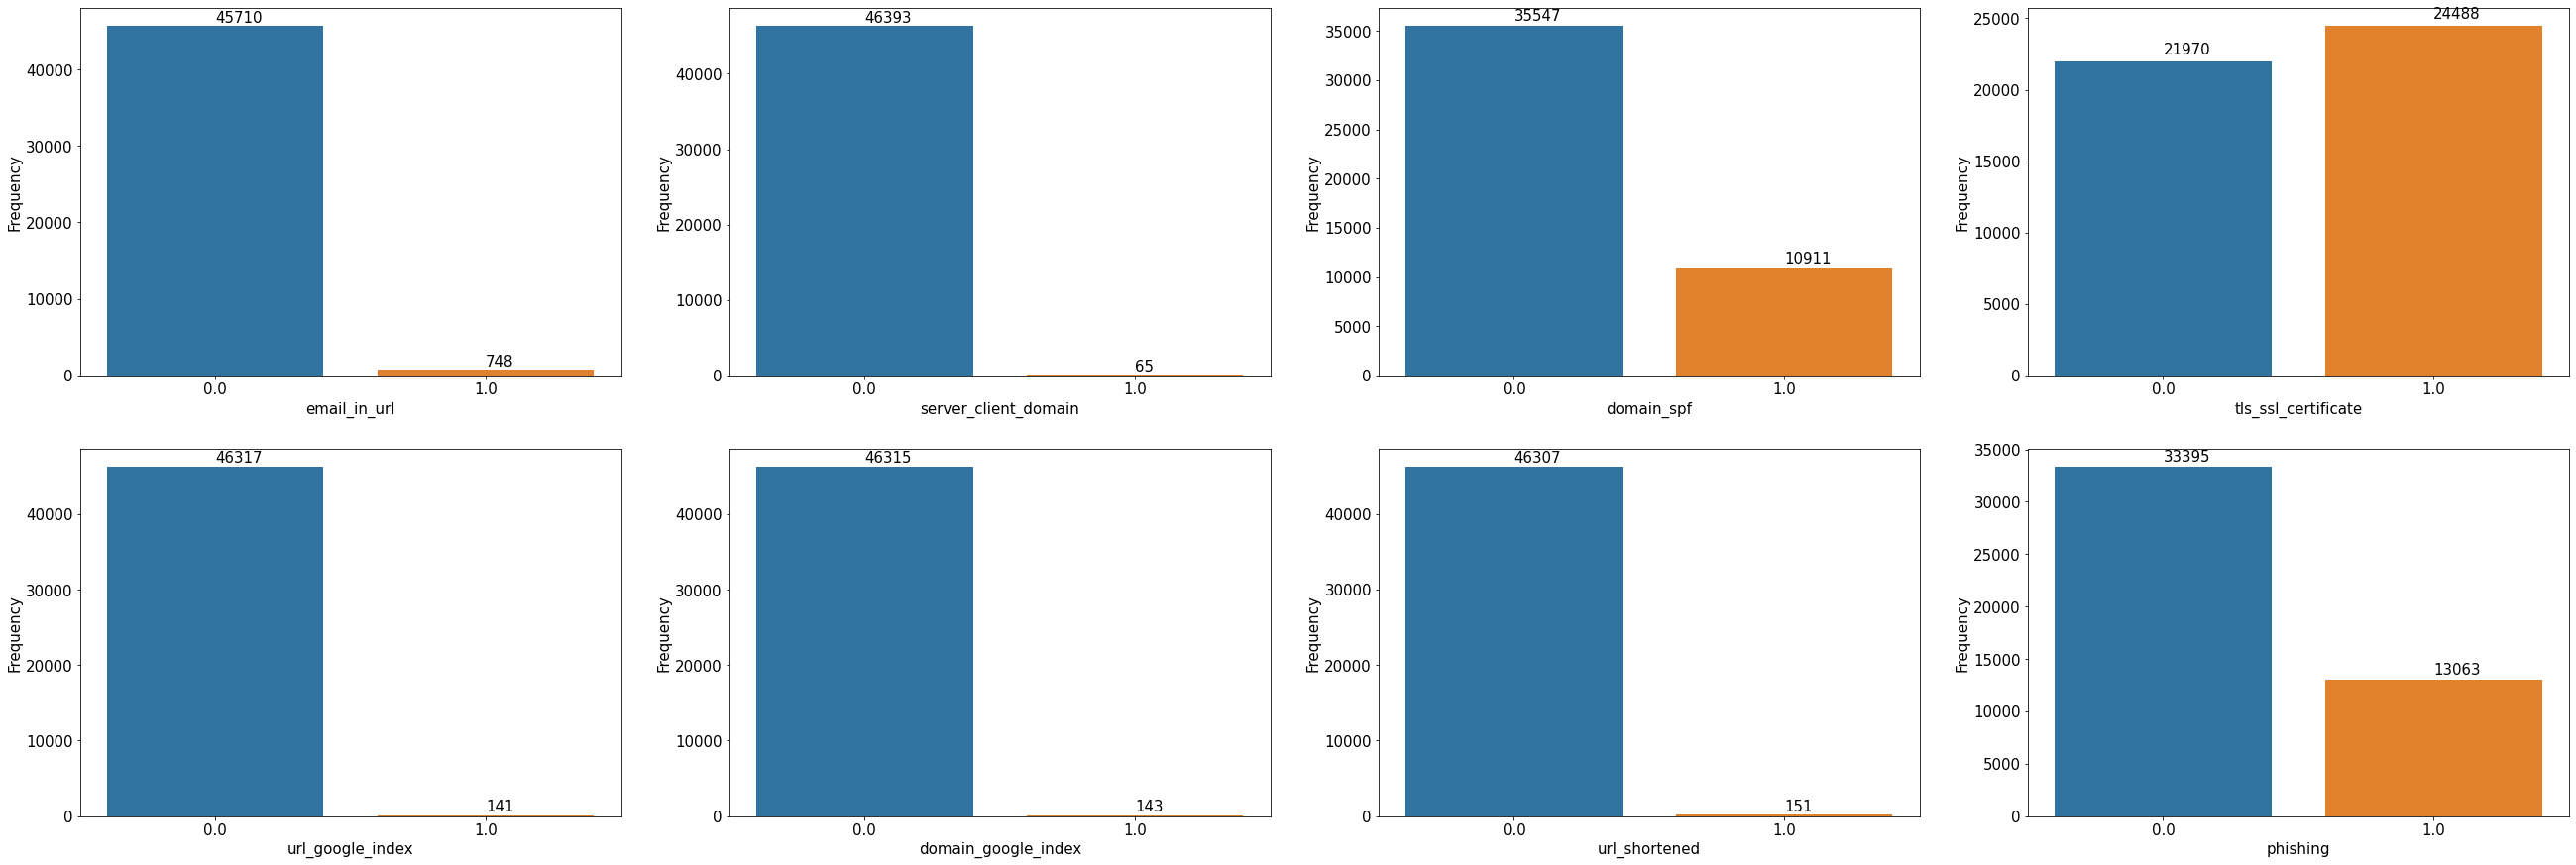

In [23]:
# Visualizing the count of each categorical variable

plt.figure(figsize=(45,15))
for i,col in enumerate(df_phishing_categorical):
    plt.subplot(2,4,i+1)
    count = sns.countplot(data=df_phishing_categorical, x=col)
    for p in count.patches:
        count.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+500), fontsize=15)
    plt.xlabel(col,fontsize=15)
    plt.ylabel('Frequency',fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

For analyzing the relationship between the binary categorical variables of this dataset, we make use of the the `Chi-Square Test` by defining a `Null Hypothesis` and an `Alernate Hypothesis` reagarding the correlation amongst the features under consideration.

1. Null hypothesis `H0`     : the categorical variables have no correlation between them.
2. Alternate Hypothesis `H1`: the categorical variables have a correlation between them.

If the p-value( second value in the result) is greater than 0.05, we `fail to reject the Null hypothesis` and conclude that the categorical variable considered is not correlated to target variable `phishing`. 

If the p-value( second value in the result) is less than 0.05, we `reject the Null hypothesis` and conclude that the categorical variable considered is correlated to target variable `phishing`. 


Observations from the Contingency table shown below:

1.  Reading the Contingency table - for instance, for `no email in url` and labeled `not phishing`, there are `33394` instances, for `no email in url` and labeled `phishing`, there are `12316` instances, for `email in url` and labeled `phishing`, there are `747` instances and for `email in url` and labeled `not phishing`, there is `1` instances.

2. Since the p-value is less than 0.05 for all the variables, we reject the NULL hypothesis and assume that all the seven categorical variables are correlated to the target variable `phishing`.



In [24]:
for col in df_phishing_categorical:
  chisqt = pd.crosstab(df_phishing_categorical[col],df_phishing.phishing,margins=True)
  value = np.array([chisqt.iloc[0, :].values,
                    chisqt.iloc[1, :].values])
  
  print("Contingency table for ", col, "and phishing")
  print(chisqt,"\n")
   
  print("Chi-Square test  result for ", col, "and phishing")
  print(chi2_contingency(value)[0:3],"\n\n---------------------------------------------------------------------") 


Contingency table for  email_in_url and phishing
phishing        0.0    1.0    All
email_in_url                     
0.0           33394  12316  45710
1.0               1    747    748
All           33395  13063  46458 

Chi-Square test  result for  email_in_url and phishing
(1936.2991712547762, 0.0, 2) 

---------------------------------------------------------------------
Contingency table for  server_client_domain and phishing
phishing                0.0    1.0    All
server_client_domain                     
0.0                   33360  13033  46393
1.0                      35     30     65
All                   33395  13063  46458 

Chi-Square test  result for  server_client_domain and phishing
(10.476045195497273, 0.005310747944823231, 2) 

---------------------------------------------------------------------
Contingency table for  domain_spf and phishing
phishing      0.0    1.0    All
domain_spf                     
0.0         27760   7787  35547
1.0          5635   5276  1091

`Analysis of numeric variables`

There are 44773 observations and 30 numeric variables present in the dataset. 

In [25]:
# Identifying the numeric variables present in the dataset

df_phishing_numeric = df_phishing.drop(df_phishing_categorical, axis=1)

In [26]:
# Checking the dimension of the numeric variables

print("Dimensions of the numeric variables",df_phishing_numeric.shape,"\n")

# Identifying the numeric variables present in the dataset

df_phishing_numeric.columns

Dimensions of the numeric variables (46458, 30) 



Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url',
       'qty_exclamation_url', 'qty_space_url', 'qty_tilde_url', 'qty_plus_url',
       'qty_asterisk_url', 'qty_hashtag_url', 'qty_dollar_url',
       'qty_percent_url', 'qty_tld_url', 'length_url', 'qty_dot_domain',
       'qty_hyphen_domain', 'qty_vowels_domain', 'domain_length',
       'time_response', 'time_domain_activation', 'time_domain_expiration',
       'qty_ip_resolved', 'qty_nameservers', 'qty_mx_servers', 'ttl_hostname',
       'qty_redirects'],
      dtype='object')

From the summary statistics, it is evident that there is scale difference between the different numeric variables, which should be handled before proceeding with the Model building phase. 

In [27]:
# Checking the summary statistics 

df_phishing_numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
qty_dot_url,46458.0,2.040208,1.120800,1.000000,2.000000,2.000000,2.000000,24.000000
qty_hyphen_url,46458.0,0.287593,1.036523,0.000000,0.000000,0.000000,0.000000,31.000000
qty_underline_url,46458.0,0.092169,0.589629,0.000000,0.000000,0.000000,0.000000,21.000000
qty_slash_url,46458.0,1.125274,1.836558,0.000000,0.000000,0.000000,2.000000,29.000000
qty_questionmark_url,46458.0,0.007146,0.099683,0.000000,0.000000,0.000000,0.000000,9.000000
qty_equal_url,46458.0,0.200331,0.941203,0.000000,0.000000,0.000000,0.000000,23.000000
qty_at_url,46458.0,0.018382,0.164968,0.000000,0.000000,0.000000,0.000000,11.000000
qty_and_url,46458.0,0.141375,0.905547,0.000000,0.000000,0.000000,0.000000,22.000000
qty_exclamation_url,46458.0,0.003057,0.072407,0.000000,0.000000,0.000000,0.000000,10.000000
qty_space_url,46458.0,0.001119,0.079814,0.000000,0.000000,0.000000,0.000000,9.000000


#### Univariate Analysis
Observations from the below distributions of all numeric variables:

1. Most of the numeric variables are skewed towards the right, indicating that as expected, most of the real-world data is skewed in nature and not normally distributed. 

2. Features `qty_vowels_domain` and `domain_length` are multi-modal in nature, while the feature `time_domain_activation` is bi-modal in nature. 

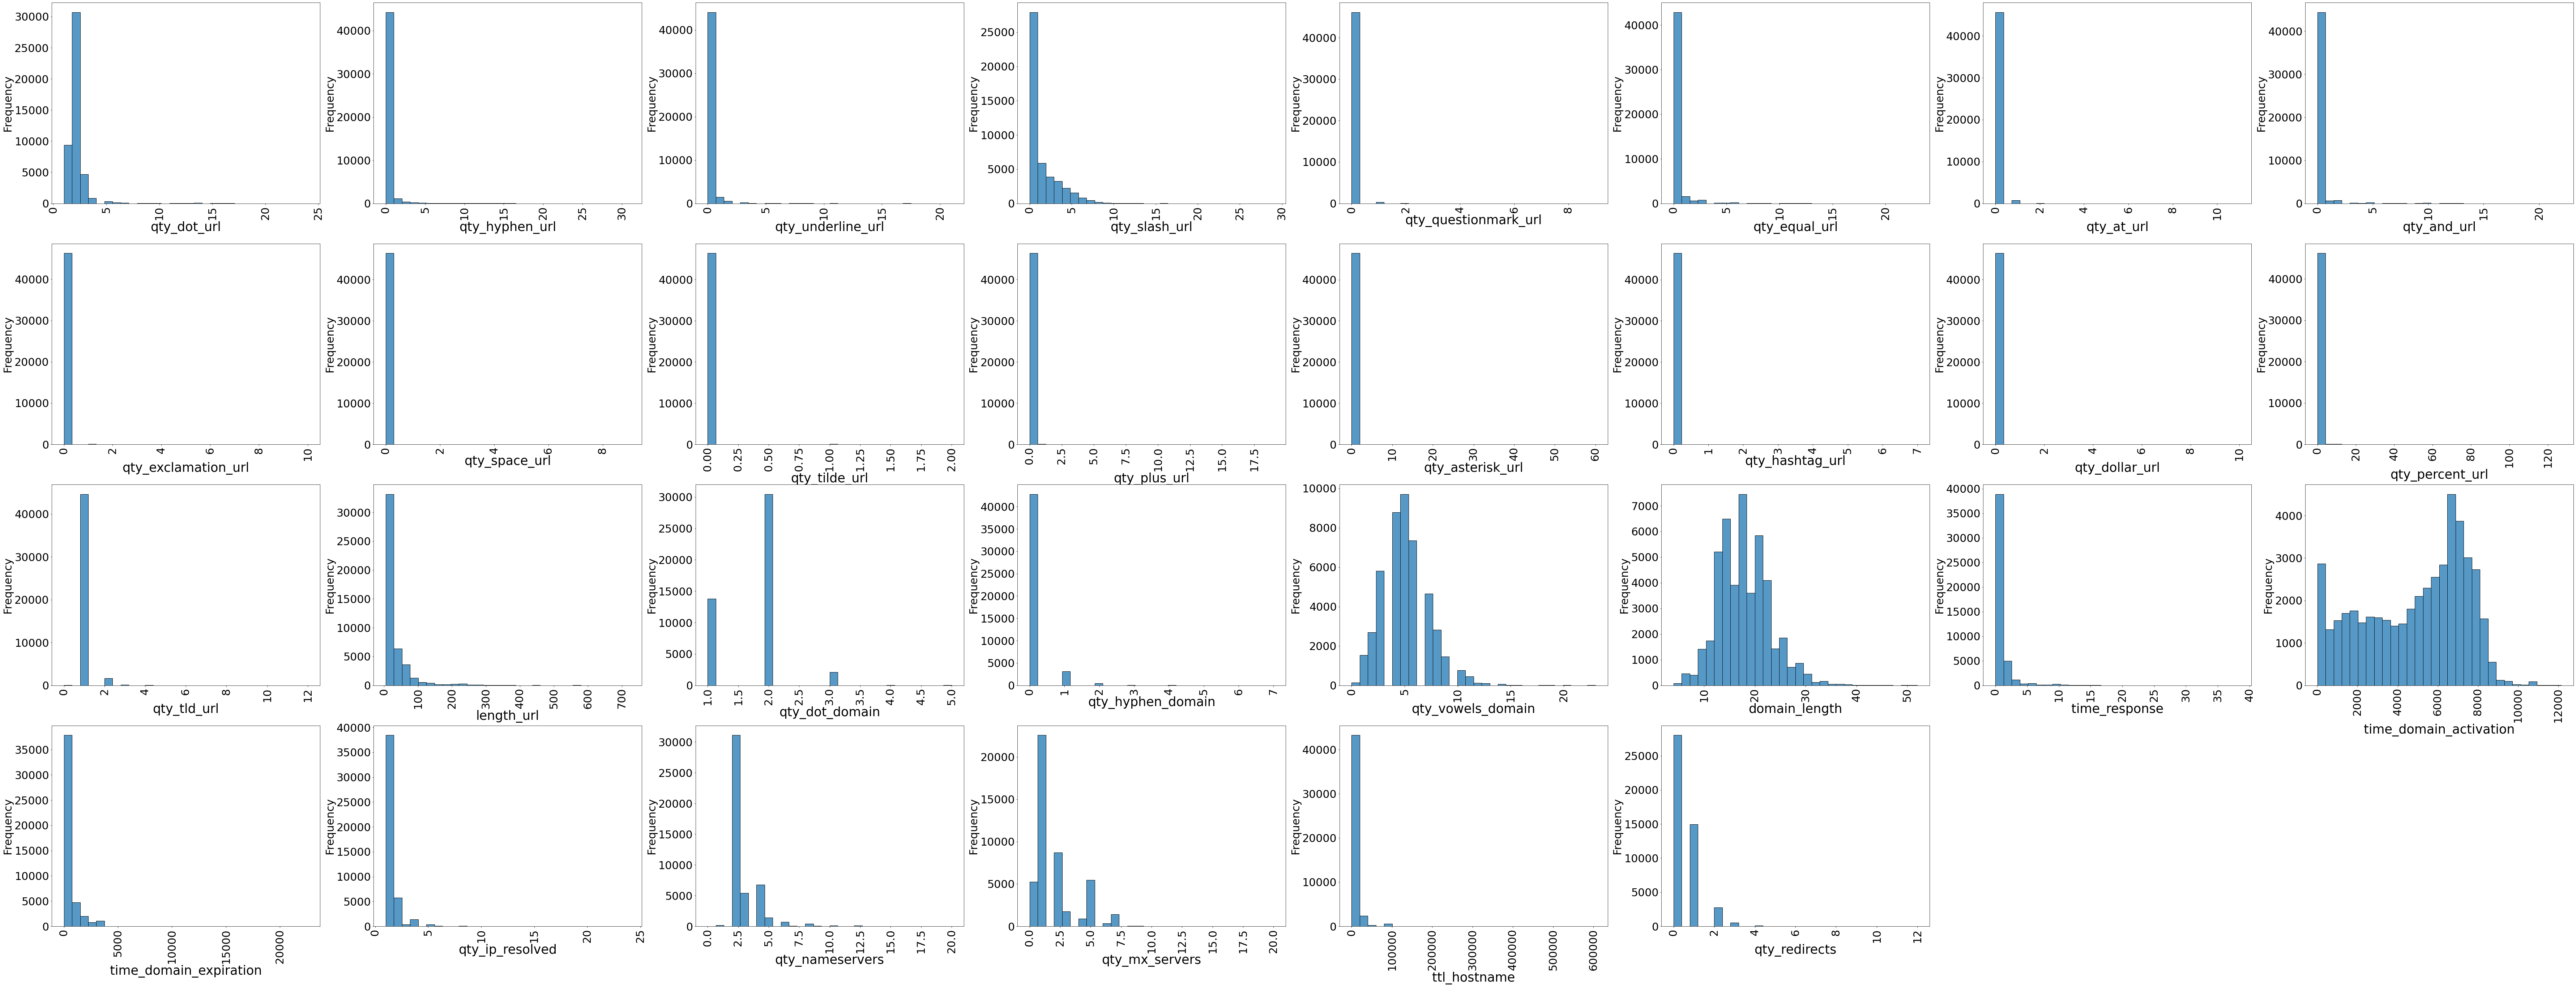

In [28]:
# Visualizing the distribution of the numeric variables using Univariate Analysis

plt.figure(figsize=(125,47))

for i,col in enumerate(df_phishing_numeric):
    plt.subplot(4,8,i+1)
    sns.histplot(data=df_phishing_numeric, x=col, bins=30)
    plt.xlabel(col, fontsize = 35)
    plt.ylabel("Frequency", fontsize = 30) 
    plt.xticks(fontsize = 30, rotation = 90)
    plt.yticks(fontsize = 30)

#### Bivariate Analysis
Observations from the below boxplots for a few features:

Both the variables have a significant number of outliers. 

1. We can see that websites instances labeled as legitimate have a higher `time_domain_activation` indicating they are authentic in comparison to phishing websites which are created for a shorter duration.  

2. The ideal length of a URL of a legitimate website is < 54 characters. As we can see for website instances labeled as phishing, `length_url` is much greater than 54 characters. 


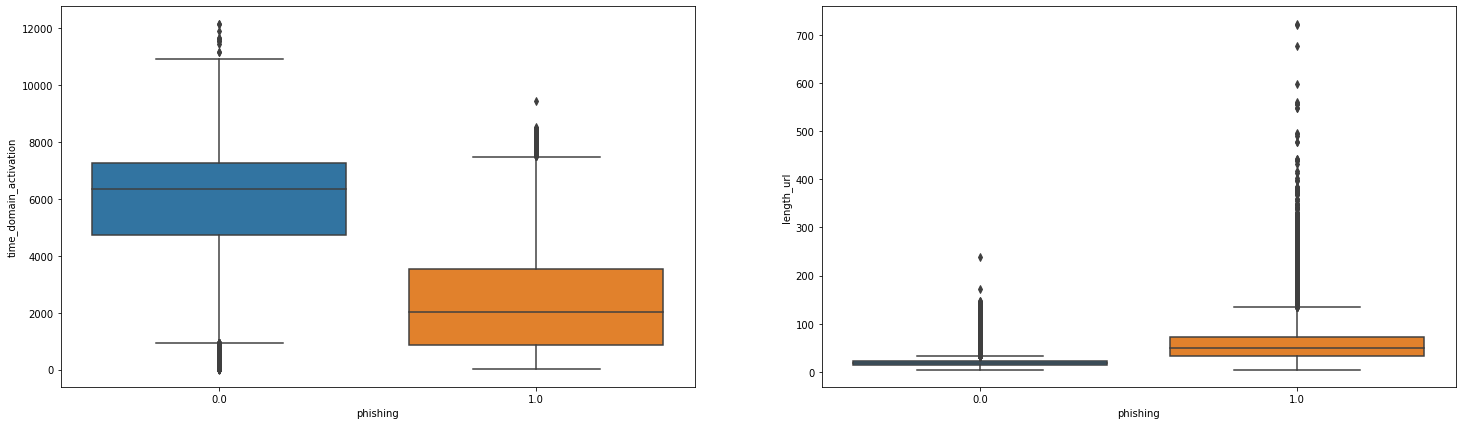

In [29]:
# Visualizing the distribution of three numeric variables using Bi-variate Analysis

plt.figure(figsize=(25,7))
cols = ['time_domain_activation', 'length_url']
for i,col in enumerate(df_phishing_numeric[cols]):
    plt.subplot(1,2,i+1)
    sns.boxplot(data=df_phishing_numeric, x=df_phishing['phishing'], y=col)

`Correlation Analysis of Numeric variables to evaluate the strength of relationship amongst these variables`

In [30]:
# Checking the correlation amongst numeric variables

df_phishing_numeric.corr()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_vowels_domain,domain_length,time_response,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,qty_redirects
qty_dot_url,1.000000,0.081281,0.134614,0.240432,0.489299,0.542709,0.311845,0.627218,0.013604,-0.005075,0.027002,0.022117,-0.001495,-0.000188,0.017610,0.064452,0.438635,0.516375,0.320158,-0.011900,0.062735,0.150930,-0.013084,-0.011314,0.004307,-0.047613,-0.032305,-0.050460,0.016450,-0.069357
qty_hyphen_url,0.081281,1.000000,0.176929,0.319110,0.066982,0.144109,0.077594,0.108268,0.020410,0.016144,0.028671,0.004956,-0.001685,-0.001456,0.026763,0.029836,0.125158,0.363150,-0.064509,0.332153,0.057426,0.041775,0.001941,-0.111276,-0.001928,0.031234,0.012454,-0.002375,-0.026479,-0.001584
qty_underline_url,0.134614,0.176929,1.000000,0.228843,0.094999,0.359137,0.116022,0.279202,0.057432,-0.001277,0.050576,0.004790,0.001713,-0.000821,0.029679,0.067619,0.176456,0.439527,-0.071917,0.038928,0.011557,-0.014565,0.005923,-0.115471,-0.031393,-0.004538,0.015474,0.002014,-0.024344,-0.047809
qty_slash_url,0.240432,0.319110,0.228843,1.000000,0.143140,0.289163,0.162272,0.215813,0.040177,0.014756,0.074462,0.018839,0.002099,0.004644,0.028855,0.036096,0.253347,0.632330,-0.315365,0.028480,0.087515,-0.057763,0.059449,-0.406130,-0.091144,-0.076516,-0.056289,-0.079916,-0.017547,-0.107291
qty_questionmark_url,0.489299,0.066982,0.094999,0.143140,1.000000,0.450708,0.308782,0.484807,0.017850,0.004406,-0.002355,-0.001597,0.002381,-0.000376,0.004443,0.020986,0.287935,0.342430,-0.045972,0.008206,0.012956,-0.006151,-0.006118,-0.053438,-0.006493,-0.017079,-0.001629,-0.031668,-0.010486,-0.028147
qty_equal_url,0.542709,0.144109,0.359137,0.289163,0.450708,1.000000,0.289038,0.908570,0.053238,0.000740,0.021868,0.041546,0.005321,-0.001117,0.037504,0.193355,0.375365,0.741412,-0.137831,0.022483,0.021812,-0.043707,0.000027,-0.153120,-0.049258,-0.029540,-0.004768,-0.000965,-0.027822,-0.085565
qty_at_url,0.311845,0.077594,0.116022,0.162272,0.308782,0.289038,1.000000,0.284187,0.027733,-0.001563,0.003998,-0.001496,0.097305,-0.000585,0.331731,0.120303,0.521499,0.284493,-0.083905,0.001757,0.029171,-0.001263,0.012528,-0.099777,-0.034813,-0.006261,-0.026526,-0.023028,0.003914,-0.038114
qty_and_url,0.627218,0.108268,0.279202,0.215813,0.484807,0.908570,0.284187,1.000000,0.041668,0.001087,0.014404,0.031707,0.030624,-0.000819,0.068103,0.169456,0.322062,0.675176,-0.105766,0.012827,0.014952,-0.033613,-0.004664,-0.113671,-0.037988,-0.021956,-0.008388,-0.008059,-0.020928,-0.066592
qty_exclamation_url,0.013604,0.020410,0.057432,0.040177,0.017850,0.053238,0.027733,0.041668,1.000000,-0.000592,-0.001387,-0.000940,0.022233,-0.000222,0.095751,0.104558,0.040989,0.069419,-0.042420,0.019583,-0.034817,-0.037329,-0.014385,-0.024429,0.002865,0.001469,0.056949,0.000965,-0.012963,0.005257
qty_space_url,-0.005075,0.016144,-0.001277,0.014756,0.004406,0.000740,-0.001563,0.001087,-0.000592,1.000000,-0.000461,-0.000312,-0.000118,-0.000074,-0.000227,-0.000698,-0.000289,0.013505,-0.017098,0.028174,0.006360,0.006063,0.016882,-0.015150,-0.004209,-0.004696,-0.006553,-0.003589,0.006172,-0.008621


From the below Heatmap showing the correlation between the numeric variables, we observe that some of the numeric variables exhibit high correlation values. e.g.,  `qty_and_url` and `qty_equal_url` have a strong relationship as their correlation coefficient is 0.909. Similarly, variables `qty_equal_url` and `length_url` have a correlation coefficient of 0.741. 
Some of the features also exhibit a negative correlation. For instance, `time_domain_activation` and `qty_slash_url` have a negative correlation coefficient of -0.406.

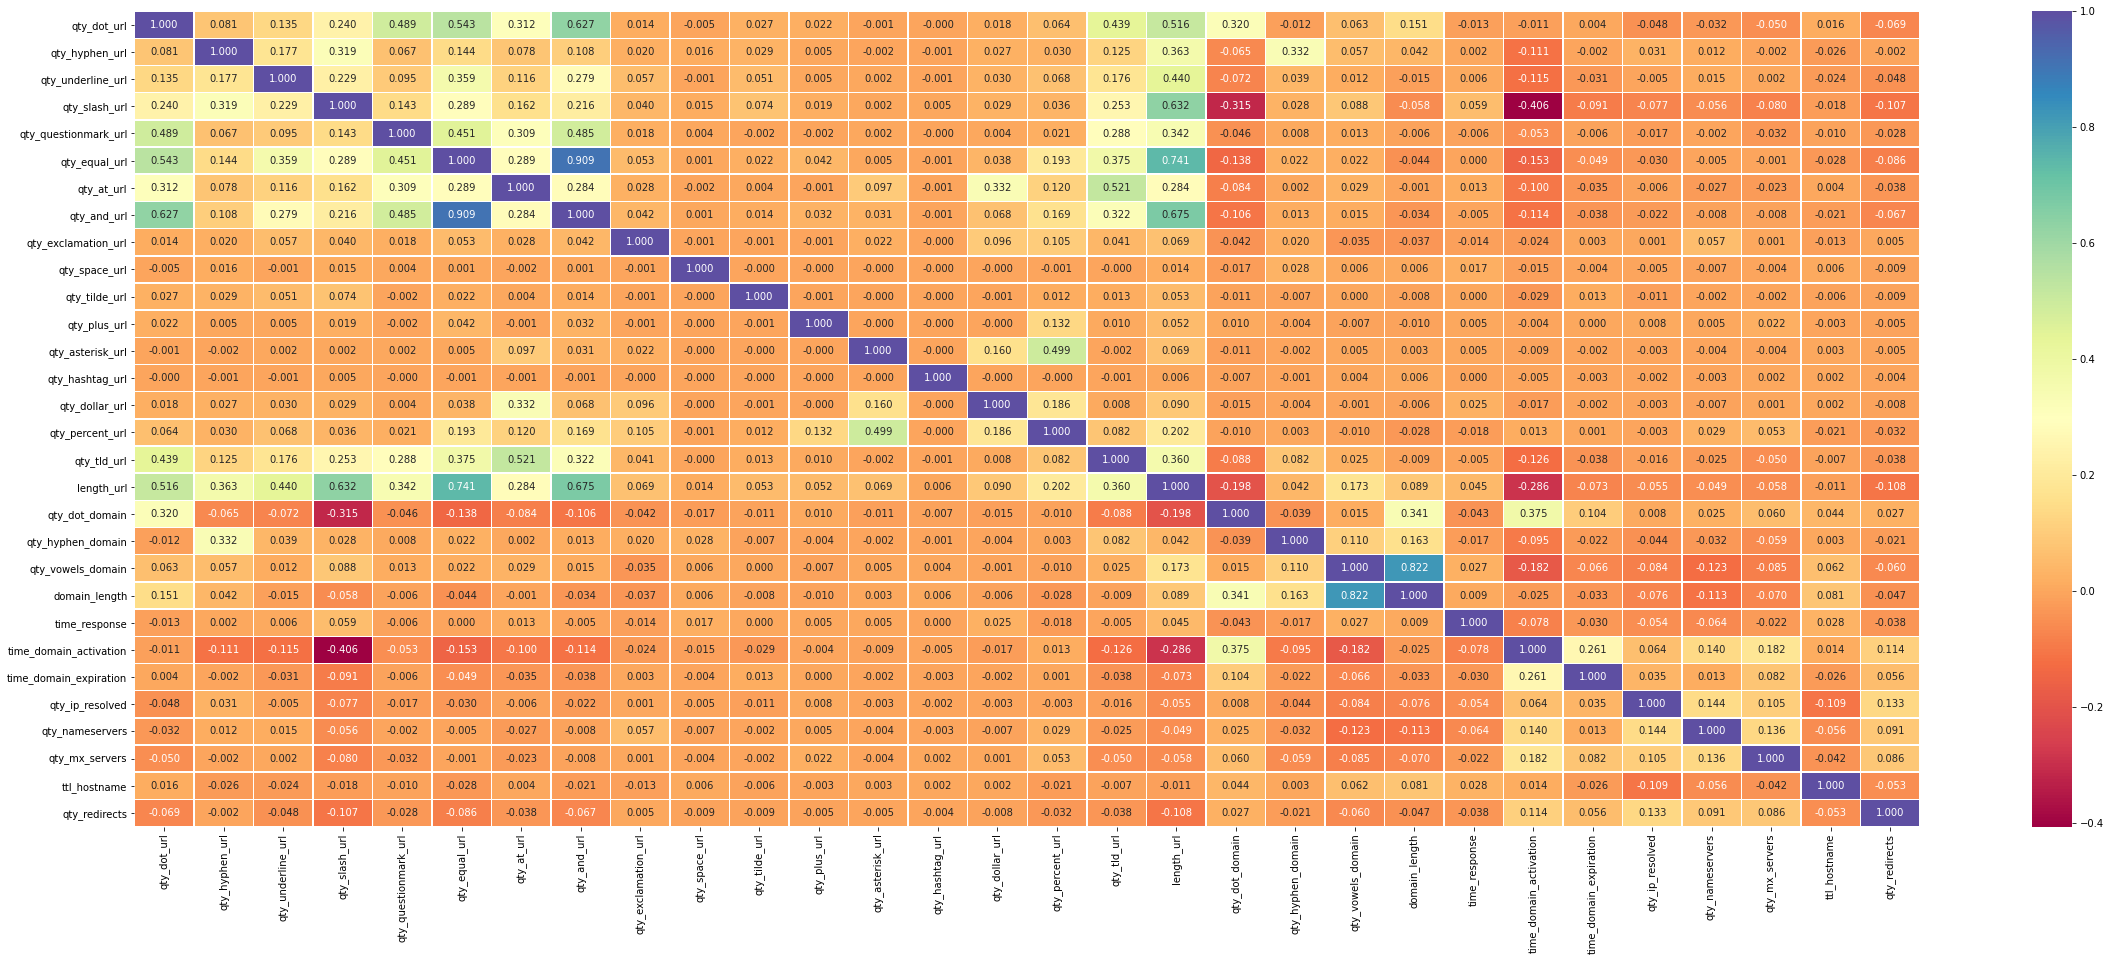

In [31]:
# Visualizing the correlation using a heatmap

plt.figure(figsize=(40,15))
sns.heatmap(df_phishing_numeric.corr(), annot=True, linewidths=.5,fmt='.3f', cmap="Spectral")

For measuring the relationship between the binary target variable and the continuous variables of this dataset, we make use of the the `PointBiserial Correlation Result` by defining a `Null Hypothesis` and an `Alernate Hypothesis` reagarding the correlation amongst the features under consideration.

1. Null hypothesis `H0`     : the continuous variable and target variable have no correlation between them.
2. Alternate Hypothesis `H1`: the continuous variable and target variable have a correlation between them.

If the p-value is greater than 0.05, we `fail to reject the Null hypothesis` and conclude that the continuous variable considered is not correlated to target variable `phishing`. 

If the p-value is less than 0.05, we `reject the Null hypothesis` and conclude that the continuous variable considered is correlated to target variable `phishing`. 


Observations from the results of the `PointBiserial Correlation Result` below:

1. For the numeric variables `qty_plus_url, qty_hashtag_url, ttl_hostname`, the p-value is greater than 0.05, we fail to reject the Null Hypothesis and assume that these numeric variables and binary cateogrical variable `phishing` are not correlated, as also explained by the correlation values in the result.

2. For all the other numeric variables, since the p-value is less than 0.05, we reject the Null Hypothesis and assume that these numeric variables and binary cateogrical variable `phishing` are correlated, as also explained by the correlation values in the result.


In [32]:
# Checking the correlation of the numeric variables with the target variable 'phishing' 

# PointBiserial correlation is used to measure the relationship between a binary variable and a continuous variable.

for col in df_phishing_numeric:
  print(col, "--->",stats.pointbiserialr(df_phishing_numeric[col], df_phishing['phishing']), "\n")


qty_dot_url ---> PointbiserialrResult(correlation=0.1550145922184327, pvalue=1.0300821845845954e-247) 

qty_hyphen_url ---> PointbiserialrResult(correlation=0.18126397966074215, pvalue=0.0) 

qty_underline_url ---> PointbiserialrResult(correlation=0.21388409554393503, pvalue=0.0) 

qty_slash_url ---> PointbiserialrResult(correlation=0.7393017409971816, pvalue=0.0) 

qty_questionmark_url ---> PointbiserialrResult(correlation=0.11078302348085296, pvalue=8.931922649771824e-127) 

qty_equal_url ---> PointbiserialrResult(correlation=0.293013124767103, pvalue=0.0) 

qty_at_url ---> PointbiserialrResult(correlation=0.1775841863841252, pvalue=0.0) 

qty_and_url ---> PointbiserialrResult(correlation=0.22535500569840522, pvalue=0.0) 

qty_exclamation_url ---> PointbiserialrResult(correlation=0.03773875815898571, pvalue=4.054069764537766e-16) 

qty_space_url ---> PointbiserialrResult(correlation=0.022422766586031786, pvalue=1.3414845610486002e-06) 

qty_tilde_url ---> PointbiserialrResult(correla

From the above Heatmap, it is evident that the `qty_equal_url` variable is highly correlated with the variable `qty_and_url` and `length_url`, thereby exhibiting `Multicollinearity`. Therefore, we can drop this variable from the dataset. Also, the variables `qty_plus_url, qty_hashtag_url, ttl_hostname` are not correlated with the target variable `phishing`, therefore we can drop these variables too. 

In [33]:
drop_list = ['qty_equal_url', 'qty_plus_url', 'qty_hashtag_url', 'ttl_hostname']
df_phishing.drop(df_phishing.loc[:,drop_list], axis=1, inplace=True)
df_phishing.columns

Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_at_url', 'qty_and_url',
       'qty_exclamation_url', 'qty_space_url', 'qty_tilde_url',
       'qty_asterisk_url', 'qty_dollar_url', 'qty_percent_url', 'qty_tld_url',
       'length_url', 'qty_dot_domain', 'qty_hyphen_domain',
       'qty_vowels_domain', 'domain_length', 'server_client_domain',
       'email_in_url', 'time_response', 'domain_spf', 'time_domain_activation',
       'time_domain_expiration', 'qty_ip_resolved', 'qty_nameservers',
       'qty_mx_servers', 'tls_ssl_certificate', 'qty_redirects',
       'url_google_index', 'domain_google_index', 'url_shortened', 'phishing'],
      dtype='object')

#### **Model Building & Performance Evaluation**

In [34]:
# Checking the dimensions of the dataset  
print("Dimensions of the Phishing dataset :",df_phishing.shape)

# Reading the first five observations of the dataset 
df_phishing.head()

Dimensions of the Phishing dataset : (46458, 34)


,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_asterisk_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_vowels_domain,domain_length,server_client_domain,email_in_url,time_response,domain_spf,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,19.0,2.0,0.0,5.0,19.0,0.0,0.0,0.410761,0.0,6998.0,306.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
8,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16.0,2.0,0.0,3.0,16.0,0.0,0.0,1.712161,0.0,778.0,316.0,1.0,4.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,24.0,1.0,0.0,4.0,14.0,0.0,0.0,0.787570,1.0,4805.0,307.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
10,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,19.0,2.0,1.0,5.0,19.0,0.0,0.0,1.799702,0.0,6241.0,1063.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
11,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,58.0,1.0,0.0,6.0,16.0,0.0,0.0,0.381044,1.0,935.0,160.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


From the summary statistics below, we see that there is a large scale difference between a few predictor variables such as `qty_dot_url` which is a numeric value and `time_domain_expiration` which is a representation of time in days. Therefore, to handle this scaling difference, we will standardize the dataset to ensure that all predictor variables are given equal importance in terms of variability. 

In [35]:
# Checking the summary statistics 
df_phishing.describe().T

,count,mean,std,min,25%,50%,75%,max
qty_dot_url,46458.0,2.040208,1.120800,1.000000,2.000000,2.000000,2.000000,24.000000
qty_hyphen_url,46458.0,0.287593,1.036523,0.000000,0.000000,0.000000,0.000000,31.000000
qty_underline_url,46458.0,0.092169,0.589629,0.000000,0.000000,0.000000,0.000000,21.000000
qty_slash_url,46458.0,1.125274,1.836558,0.000000,0.000000,0.000000,2.000000,29.000000
qty_questionmark_url,46458.0,0.007146,0.099683,0.000000,0.000000,0.000000,0.000000,9.000000
qty_at_url,46458.0,0.018382,0.164968,0.000000,0.000000,0.000000,0.000000,11.000000
qty_and_url,46458.0,0.141375,0.905547,0.000000,0.000000,0.000000,0.000000,22.000000
qty_exclamation_url,46458.0,0.003057,0.072407,0.000000,0.000000,0.000000,0.000000,10.000000
qty_space_url,46458.0,0.001119,0.079814,0.000000,0.000000,0.000000,0.000000,9.000000
qty_tilde_url,46458.0,0.001119,0.034075,0.000000,0.000000,0.000000,0.000000,2.000000


In [36]:
# Standardizing the numeric variables of the phishing dataframe to ensure equal importance is given to all variables in terms of variability

# Selecting all the numeric variable other than the target variable
df_phishing_numeric = df_phishing.iloc[:,0:33]

# Using the StandardScaler from sklearn to standardize the numeric data such that they are centered around mean = 0 and standard deviation = 1 
df_phishing_std = StandardScaler().fit_transform(df_phishing_numeric)

# Creating a separate dataframe using the standardized data
df_phishing_std = pd.DataFrame(df_phishing_std, columns=df_phishing.iloc[:,0:33].columns)
df_phishing_std

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_asterisk_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_vowels_domain,domain_length,server_client_domain,email_in_url,time_response,domain_spf,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened
0,-0.035875,-0.277462,-0.156319,-0.612715,-0.071691,-0.11143,-0.156123,-0.042213,-0.014024,-0.032848,-0.008401,-0.016199,-0.064911,-0.182098,-0.373970,0.463246,-0.268325,-0.047826,0.241611,-0.037431,-0.127922,-0.361615,-0.554027,0.846081,-0.314362,-0.359953,-0.527233,-0.518988,-1.055751,0.725506,-0.055175,-0.055566,-0.057104
1,-0.035875,-0.277462,-0.156319,-0.612715,-0.071691,-0.11143,-0.156123,-0.042213,-0.014024,-0.032848,-0.008401,-0.016199,-0.064911,-0.182098,-0.452054,0.463246,-0.268325,-0.978860,-0.353468,-0.037431,-0.127922,0.618100,-0.554027,-1.603184,-0.299768,-0.359953,1.030871,0.050948,0.947193,0.725506,-0.055175,-0.055566,-0.057104
2,-0.928105,-0.277462,-0.156319,0.476290,-0.071691,-0.11143,-0.156123,-0.042213,-0.014024,-0.032848,-0.008401,-0.016199,-0.064911,-0.182098,-0.243831,-1.398151,-0.268325,-0.513343,-0.750188,-0.037431,-0.127922,-0.077947,1.804967,-0.017462,-0.312902,-0.359953,-0.527233,-0.518988,0.947193,-0.696789,-0.055175,-0.055566,-0.057104
3,-0.035875,0.687312,-0.156319,-0.612715,-0.071691,-0.11143,-0.156123,-0.042213,-0.014024,-0.032848,-0.008401,-0.016199,-0.064911,-0.182098,-0.373970,0.463246,2.619961,-0.047826,0.241611,-0.037431,-0.127922,0.684002,-0.554027,0.547996,0.790359,-0.359953,-0.527233,-0.518988,-1.055751,0.725506,-0.055175,-0.055566,-0.057104
4,-0.928105,-0.277462,-0.156319,1.020793,-0.071691,-0.11143,-0.156123,-0.042213,-0.014024,-0.032848,-0.008401,-0.016199,-0.064911,-0.182098,0.641120,-1.398151,-0.268325,0.417691,-0.353468,-0.037431,-0.127922,-0.383986,1.804967,-1.541361,-0.527426,-0.359953,-0.527233,-0.518988,0.947193,-0.696789,-0.055175,-0.055566,-0.057104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46453,-0.035875,0.687312,-0.156319,1.565296,-0.071691,-0.11143,-0.156123,-0.042213,-0.014024,-0.032848,-0.008401,-0.016199,-0.064911,-0.182098,0.198644,-1.398151,-0.268325,-0.513343,-0.948547,-0.037431,-0.127922,-0.260761,-0.554027,-1.655949,-0.636876,-0.359953,-0.527233,-0.518988,0.947193,-0.696789,-0.055175,-0.055566,-0.057104
46454,0.856355,0.687312,-0.156319,-0.612715,-0.071691,-0.11143,-0.156123,-0.042213,-0.014024,-0.032848,-0.008401,-0.016199,-0.064911,4.016363,-0.269859,2.324643,2.619961,-0.047826,1.035051,-0.037431,-0.127922,-0.569072,-0.554027,0.259754,-0.273500,-0.359953,0.251819,-0.518988,-1.055751,-0.696789,-0.055175,-0.055566,-0.057104
46455,-0.035875,-0.277462,-0.156319,-0.612715,-0.071691,-0.11143,-0.156123,-0.042213,-0.014024,-0.032848,-0.008401,-0.016199,-0.064911,-0.182098,0.016449,0.463246,-0.268325,4.141826,3.217008,-0.037431,-0.127922,-0.371236,-0.554027,0.077437,-0.131944,-0.359953,-0.527233,0.050948,-1.055751,2.147801,-0.055175,-0.055566,-0.057104
46456,-0.035875,0.687312,-0.156319,2.109799,-0.071691,-0.11143,-0.156123,-0.042213,-0.014024,-0.032848,-0.008401,-0.016199,-0.064911,-0.182098,0.953455,-1.398151,-0.268325,0.417691,0.836691,-0.037431,-0.127922,-0.109972,-0.554027,-1.183422,0.278131,-0.359953,-0.527233,1.760756,0.947193,-0.696789,-0.055175,-0.055566,-0.057104


In [37]:
# Defining X as the predictor variables and y as the target variable
X = df_phishing_std.iloc[:,0:33]
y = df_phishing.iloc[:,33]

From the below result, we observe that Class 0 which indicates the number of instances of legitimate websites has 33395 observations and Class 1, which indicates the number of instances of phishing websites has a total of 13063 observations, indicating that there is class imbalance which may need to be handled using Oversampling if the performance of .

In [38]:
# Checking the count of variables in each Class of the binary target variable 
df_phishing.phishing.value_counts()

0.0    33395
1.0    13063
Name: phishing, dtype: int64

### **Building the Classification Models**

#### Data Partitioning: 

The `Hold out Method` will be used for splitting the Phishing dataset, such that the train and test sets generated are of the ratio `70:30`, i.e., 70% of the dataset will be used for training the classification models and the remaining 30% of the dataset will be used for evaluation of the classification performance of those models. 

In [39]:
# Splitting the dataset into 70% train and 30% test data using the Holdout method 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.7, random_state=0)

In [40]:
# Checking the dimensions of the train and test data
print("Dimensions of X_train: ",X_train.shape)
print("Dimensions of y_train: ",y_train.shape)
print("Dimensions of X_test: ",X_test.shape)
print("Dimensions of y_test: ",y_test.shape)

Dimensions of X_train:  (32520, 33)
Dimensions of y_train:  (32520,)
Dimensions of X_test:  (13938, 33)
Dimensions of y_test:  (13938,)


### **1. k-NN Classifier**

In the k-NN Classification algorithm, the key idea is the use of similar records in the training data to classify a new record from the test data.
The `k-nearest neighbors` are used to determine the similar records, and then a majority decision rule is used to classify the new record as a member of the majority class of the k-neighbors. 

Advantages:

*   Simple method, with no parametric assumptions. 
*   Performs well on large training datasets.

Disadvantages:

*  Sensitive to large scale differences and outliers.
*  Time-consuming computation involved in finding the distances. 
*  The number of records required in the training set to qualify as large  increases exponentially with the number of predictors p.



Highest Accuracy is for :
+----+-----+------------+----------+------------+--------------------+
|    |   k | Distance   | Weight   |   Accuracy |   Validation Error |
+====+=====+============+==========+============+====================+
|  4 |   4 | manhattan  | distance |   0.964557 |          0.0354427 |
+----+-----+------------+----------+------------+--------------------+

Evaluation Metrics:
+----+-----+------------+----------+------------+--------------------+
|    |   k | Distance   | Weight   |   Accuracy |   Validation Error |
+====+=====+============+==========+============+====================+
|  1 |   1 | manhattan  | distance |   0.959966 |          0.0400344 |
+----+-----+------------+----------+------------+--------------------+
|  2 |   2 | manhattan  | distance |   0.959966 |          0.0400344 |
+----+-----+------------+----------+------------+--------------------+
|  3 |   3 | manhattan  | distance |   0.963768 |          0.0362319 |
+----+-----+------------+----

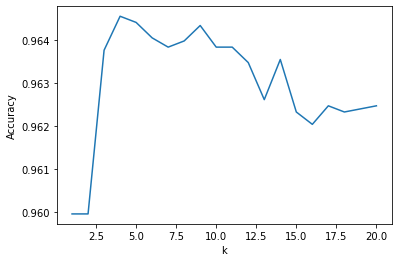

In [41]:
# Creating an empty dataframe to store the performance evaluation metrics
df_phishing_kNNclassification = pd.DataFrame(columns = ['k','Distance','Weight','Accuracy','Validation Error'])


metrics = ['euclidean', 'manhattan']
weight = ['uniform', 'distance']

# Iterating 20 times to evaluate the performance of the '20' nearest neighbors
for i in np.arange(1,21):
  for j in metrics:
    for k in weight:
    
      # Creating the instance for the k-NN Classification model
      knn_classifier = neighbors.KNeighborsClassifier(n_neighbors = i, metric=j, weights=k)

      # Fitting the k-NN Classifier
      knn_classifier.fit(X_train,y_train)

      # Making prediction on the test set 
      y_pred_knn = knn_classifier.predict(X_test)

      # Evaluating the predictive performance of the model using different metrics
      accuracy_knn = accuracy_score(y_test, y_pred_knn)
      validation_error = 1-accuracy_score(y_test, y_pred_knn)

      df_phishing_kNNclassification.loc[i] = [i,j,k,accuracy_knn,validation_error]

# Displaying the final dataframe to select the best value of k to train the model on 
print("\nHighest Accuracy is for :")
print(tabulate(df_phishing_kNNclassification[df_phishing_kNNclassification['Accuracy']==df_phishing_kNNclassification['Accuracy'].max()],headers='keys', tablefmt='grid'))

print("\nEvaluation Metrics:")
print(tabulate(df_phishing_kNNclassification, headers='keys', tablefmt='grid'))  

# Visualizing the accuracy for the different values of the k-neighbors
sns.lineplot(x='k', y='Accuracy', data=df_phishing_kNNclassification)

#### **From the above results, we infer that the model achieves the highest accuracy for the value `k=4`. Therefore, training the model with this best value of k, to further evaluate the classification perfomance of the k-NN Classification model**

In [42]:
# Creating an empty dataframe to store the performance evaluation metrics
df_phishing_kNN_classification = pd.DataFrame(columns = ['k','Overall Accuracy','Validation Error', 'Sensitivity', 'Specificity','F-1 Score'])


# Creating the instance for the k-NN Classification model with k=3
knn_classifier = neighbors.KNeighborsClassifier(n_neighbors = 4, metric='manhattan', weights='distance')

# Fitting the k-NN Classifier
knn_classifier.fit(X_train,y_train)

# Making prediction on the test set 
y_pred_knn = knn_classifier.predict(X_test)
y_pred_knn_prob = knn_classifier.predict_proba(X_test)

# Evaluating the predictive performance of the model using different metrics
if(len(y_test) == len(y_pred_knn)):
                  if((np.isin(y_test,[0,1]).all()) and (np.isin(y_pred_knn,[0,1]).all())):
                      tp = 0 # predicted = actual = 1
                      fn = 0 # predicted = 0; actual = 1
                      fp = 0 # predicted = 1; actual = 0
                      tn = 0 # predicted = actual = 0                     
                      
                      for actual_val, predicted_val in zip(y_test,y_pred_knn):
                          if predicted_val == actual_val:  # if the predicted value is equal to actual value and equal to 1 (TP)
                              if predicted_val == 1: 
                                tp = tp + 1
                              else: # else if the predicted value is equal to actual value and equal to 0 (TN)
                                tn = tn + 1
                          else: # if the predicted value is not equal to actual value(pred=1, actual=0) (FP)
                              if predicted_val == 1:
                                fp = fp + 1
                              else: # else if the predicted value is not equal to actual value(pred=0, actual=1) (FN)
                                fn = fn + 1
                      
                      # Computing the different performance evaluation metrics based on values derived above

                      # Confusion matrix
                      confusion_matrix_knn = np.array([[tp, fn],
                                                       [fp, tn]])
                      df_confusion_matrix = pd.DataFrame(confusion_matrix_knn, columns =['Predicted(Phishing :1)', 'Predicted(Legitimate:0)'], index = ['Actual(Phishing :1)', 'Actual(Legitimate:0)'])   
                      
                      # Overall Accuracy
                      overall_accuracy = (tp+tn)/(tn+fp+fn+tp)

                      # Missclassification Error
                      validation_error = (fp+fn)/(tn+fp+fn+tp)

                      # Sensitivity
                      sensitivity = tp/(fn+tp) 

                      # Specificity
                      specificity = tn/(fp+tn) 

                      # F-1 Score
                      f1_score = (2*tp)/((2*tp)+fp+fn)

                      df_phishing_kNN_classification.loc[0] = [4,overall_accuracy,validation_error,sensitivity,specificity,f1_score]

# Displaying the final confusion matrix and results obtained from the different evaluation metrics 
print("Original Confusion Matrix:")
print(tabulate(df_confusion_matrix, headers='keys', tablefmt='grid'))  

print("\nEvaluation Metrics:")
print(tabulate(df_phishing_kNN_classification, headers='keys', tablefmt='grid'))  

Original Confusion Matrix:
+----------------------+--------------------------+---------------------------+
|                      |   Predicted(Phishing :1) |   Predicted(Legitimate:0) |
+======================+==========================+===========================+
| Actual(Phishing :1)  |                     3573 |                       323 |
+----------------------+--------------------------+---------------------------+
| Actual(Legitimate:0) |                      171 |                      9871 |
+----------------------+--------------------------+---------------------------+

Evaluation Metrics:
+----+-----+--------------------+--------------------+---------------+---------------+-------------+
|    |   k |   Overall Accuracy |   Validation Error |   Sensitivity |   Specificity |   F-1 Score |
+====+=====+====================+====================+===============+===============+=============+
|  0 |   4 |           0.964557 |          0.0354427 |      0.917094 |      0.982972 |   

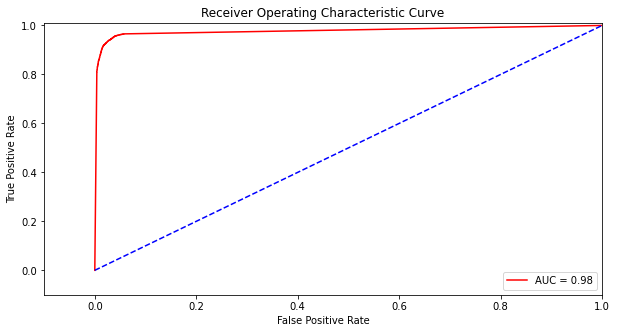

In [43]:
# Plottting the ROC Curve and checking the Area Under the Curve value
fpr, tpr, threshold = roc_curve(y_test, y_pred_knn_prob[:,1])
roc_auc = auc(fpr,tpr)
plt.figure(figsize=[10,5])
plt.title('Receiver Operating Characteristic Curve')
plt.plot(fpr, tpr, 'r',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### **2. Decision Tree Classifier**

The Decision Tree Classifier is a data-driven or non-parametric method which uses a tree-like model to make predictions. Trees create splits on predictors such that homeogeneity increases after each split, thereby segregating records into sub-groups and generating easily interpretable logical rules.

Advantages:

* Computationally cheap to deploy on large samples. 
* Can handle missing values and are robust to outliers.
* Useful for variable selection, as most important predictors genrally appear at the top of the tree. 
* variable subset selection is automated as part of the split selection. 

Disadvantages:

* Requires a larger dataset to construct a good classifier. 
* Large trees are prone to overfitting. 

In [44]:
# Creating the instance for the Decision Tree Classifier model 
decision_tree_classifier = DecisionTreeClassifier(min_samples_split=5,random_state=0)

# Fitting the decision tree model 
decision_tree_classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [45]:
# Making prediction on the test set 
y_pred_dt = decision_tree_classifier.predict(X_test)

df_phishing_dt_classification = pd.DataFrame(columns=['Accuracy', 'Validation Error'])

# Evaluating the predictive performance of the model using different metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
validation_error_dt = 1-accuracy_score(y_test, y_pred_dt)

df_phishing_dt_classification.loc[0] = [accuracy_dt,validation_error_dt]

print("\nEvaluation Metrics:")
print(tabulate(df_phishing_dt_classification, headers='keys', tablefmt='grid'))  


Evaluation Metrics:
+----+------------+--------------------+
|    |   Accuracy |   Validation Error |
+====+============+====================+
|  0 |   0.963122 |          0.0368776 |
+----+------------+--------------------+


#### **Optimizing the Decision Tree model**

Maximum Accuracy:

+----+---------+------------------+------------+
|    |   Depth | impuritymethod   |   Accuracy |
+====+=========+==================+============+
| 21 |      11 | gini             |   0.964557 |
+----+---------+------------------+------------+

Evaluation Metrics:


 +----+---------+------------------+------------+
|    |   Depth | impuritymethod   |   Accuracy |
+====+=========+==================+============+
|  1 |       1 | gini             |   0.90221  |
+----+---------+------------------+------------+
|  2 |       1 | entropy          |   0.871789 |
+----+---------+------------------+------------+
|  3 |       2 | gini             |   0.915268 |
+----+---------+------------------+------------+
|  4 |       2 | entropy          |   0.90221  |
+----+---------+------------------+------------+
|  5 |       3 | gini             |   0.936433 |
+----+---------+------------------+------------+
|  6 |       3 | entropy          |   0.920505 |
+----+---------+----------

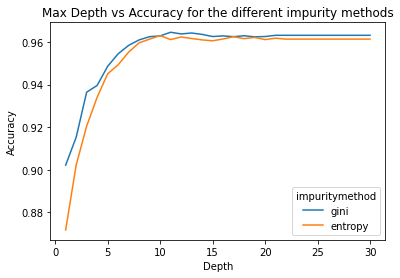

In [46]:
# Obtaining the Overall accuracy for different 'max_depth' and impurity methods of the tree
index = 1

# Defining the different impurity criterions
impurity_criteria = ['gini', 'entropy']

# Creating an empty dataframe to store the results 
df_results = pd.DataFrame(columns = ['Depth', 'impuritymethod', 'Accuracy'])

# Iterating to vary the max_depth upto 30 
for i in np.arange(1, 31):

  # Iterating through the two purity methods
  for j in impurity_criteria:

    # Creating the object of the Decision Tree Classifier
    decision_tree_model = DecisionTreeClassifier(max_depth=i, min_samples_split=5, criterion=j, random_state=0)

    # Fitting the decision tree model
    decision_tree_model.fit(X_train, y_train)

    # Making prediction using the Test set
    pred = decision_tree_model.predict (X_test)

    df_results.loc[index] = [i, j, accuracy_score(y_test, pred)]
    index+=1

# Displaying the final dataframe with the evaluation results

print("Maximum Accuracy:\n")
print(tabulate(df_results[df_results['Accuracy']==df_results['Accuracy'].max()], headers='keys', tablefmt='grid'))

print("\nEvaluation Metrics:\n")
print("\n",tabulate(df_results, headers='keys', tablefmt='grid'),"\n")

sns.lineplot(x = 'Depth', y = 'Accuracy', hue='impuritymethod', data = df_results)
plt.title("Max Depth vs Accuracy for the different impurity methods")
plt.show()

#### From the above results, we infer that the best accuracy of the decison tree calssifier is achieved with a `max_depth = 11`, and impurity criteria `gini`. Therefore, training the model with the best accuracy value for `max_depth=11` and impurity criteria `gini`, to further evaluate the classification performance of the Decision Tree Classification model.

In [47]:
# Creating the instance for the Decision Tree Classifier model 
dt_classifier = DecisionTreeClassifier(max_depth=11, min_samples_split=5, criterion='gini', random_state=0)

# Fitting the decision tree model 
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=11, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

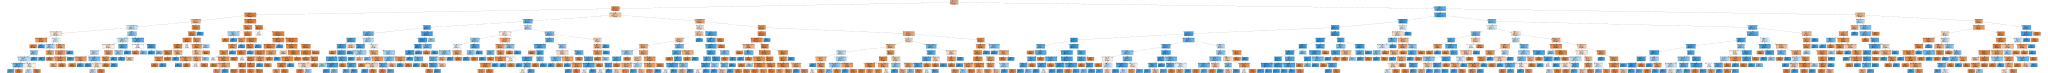

In [48]:
# Visualizing the decision tree uing 'graphviz' package
dot_data = tree.export_graphviz(dt_classifier, out_file=None, feature_names=X_train.columns, class_names=['(Legitimate:0)','(Phishing:1)'], filled=True) 
graph = graphviz.Source(dot_data) 
graph

In [49]:
# Making the prediction on the Test set
y_pred_dt = dt_classifier.predict(X_test)
y_pred_dt_prob = dt_classifier.predict_proba(X_test)

# Evaluating the predictive performance of the decision tree model using difference metrics of classification
df_phishing_classification_tree = pd.DataFrame(columns = ['Overall Accuracy','Validation Error', 'Sensitivity','Specificity','F-1 Score'])

if(len(y_test) == len(y_pred_dt)):
                  if((np.isin(y_test,[0,1]).all()) and (np.isin(y_pred_dt,[0,1]).all())):
                      tp = 0 # predicted = actual = 1
                      fn = 0 # predicted = 0; actual = 1
                      fp = 0 # predicted = 1; actual = 0
                      tn = 0 # predicted = actual = 0                     
                      
                      for actual_val, predicted_val in zip(y_test,y_pred_dt):
                          if predicted_val == actual_val:  # if the predicted value is equal to actual value and equal to 1 (TP)
                              if predicted_val == 1: 
                                tp = tp + 1
                              else: # else if the predicted value is equal to actual value and equal to 0 (TN)
                                tn = tn + 1
                          else: # if the predicted value is not equal to actual value(pred=1, actual=0) (FP)
                              if predicted_val == 1:
                                fp = fp + 1
                              else: # else if the predicted value is not equal to actual value(pred=0, actual=1) (FN)
                                fn = fn + 1
                      
                      # Computing the different performance evaluation metrics based on values derived above

                      # Confusion matrix
                      confusion_matrix_tree = np.array([[tp, fn],
                                                        [fp, tn]])
                      df_confusion_matrix_tree = pd.DataFrame(confusion_matrix_tree, columns =['Predicted(phishing-1)', 'Predicted(legitimate-0)'], index = ['Actual(phishing-1)', 'Actual(legitimate-0)'])   

                      # Overall Accuracy
                      overall_accuracy_tree = (tp+tn)/(tn+fp+fn+tp)

                      # Missclassification Error
                      validation_error_tree = (fp+fn)/(tn+fp+fn+tp)

                      # Sensitivity
                      sensitivity_tree = tp/(fn+tp) 

                      # Specificity
                      specificity_tree = tn/(fp+tn) 

                      # F-1 score
                      f1_score_tree = (2*tp)/((2*tp)+fp+fn)

                      df_phishing_classification_tree.loc[0] = [overall_accuracy_tree,validation_error_tree,sensitivity_tree,specificity_tree,f1_score_tree]


# Displaying the final confusion matrix and results obtained from the different evaluation metrics 
print("Original Confusion Matrix:")
print(tabulate(df_confusion_matrix_tree, headers='keys', tablefmt='grid'))  

print("\nEvaluation Metrics:")
print(tabulate(df_phishing_classification_tree, headers='keys', tablefmt='grid'))  

Original Confusion Matrix:
+----------------------+-------------------------+---------------------------+
|                      |   Predicted(phishing-1) |   Predicted(legitimate-0) |
+======================+=========================+===========================+
| Actual(phishing-1)   |                    3623 |                       273 |
+----------------------+-------------------------+---------------------------+
| Actual(legitimate-0) |                     221 |                      9821 |
+----------------------+-------------------------+---------------------------+

Evaluation Metrics:
+----+--------------------+--------------------+---------------+---------------+-------------+
|    |   Overall Accuracy |   Validation Error |   Sensitivity |   Specificity |   F-1 Score |
+====+====================+====================+===============+===============+=============+
|  0 |           0.964557 |          0.0354427 |      0.929928 |      0.977992 |    0.936176 |
+----+-------------

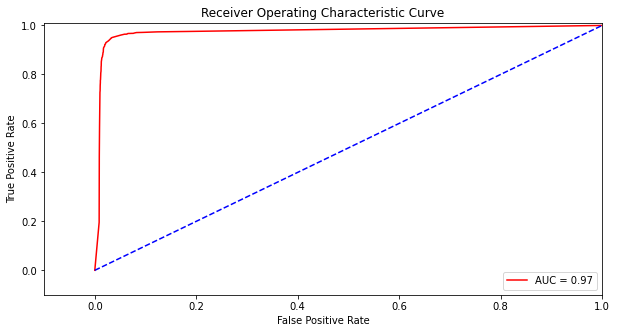

In [50]:
# Plottting the ROC Curve and checking the Area Under the Curve value
fpr, tpr, threshold = roc_curve(y_test, y_pred_dt_prob[:,1])
roc_auc = auc(fpr,tpr)
plt.figure(figsize=[10,5])
plt.title('Receiver Operating Characteristic Curve')
plt.plot(fpr, tpr, 'r',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### **3. Logistic Regression**

Logistic Regression is a parametric classification model that relies on a specific model relating the predictor variables with the target variable, such that the outcome variable is categorical in nature. The output is the estimates of the probabilities of belonging to each class, then using a threshold cutoff  on the probabilities for classifying into either of the classes. The outcome variable is called `logit`, which can be modeled as a linear function of the predictors. 

Advantages:

* Easily understandable and offers an intuitive explanation of predictors.
* Computationally fast and cheap to clasify large samples of new data.

Disadvantages:

* Cannot be used to solve non-linear problems. 
* Requires predictor variables to be linearly associated with log odds. 
* Sensitive to outliers. 


In [51]:
# Creating the instance for the Logistic Regression Classification model 
lr_classifier = LogisticRegression(random_state=0)

# Fitting the Logistic Regression model 
lr_classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
# Making prediction on the test set 
y_pred_lr = lr_classifier.predict(X_test)

df_phishing_lr_classification = pd.DataFrame(columns=['Accuracy', 'Validation Error'])

# Evaluating the predictive performance of the model using different metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
validation_error_lr = 1-accuracy_score(y_test, y_pred_lr)

df_phishing_lr_classification.loc[0] = [accuracy_lr,validation_error_lr]

print("\nEvaluation Metrics:")
print(tabulate(df_phishing_lr_classification, headers='keys', tablefmt='grid'))  


Evaluation Metrics:
+----+------------+--------------------+
|    |   Accuracy |   Validation Error |
+====+============+====================+
|  0 |   0.954513 |          0.0454872 |
+----+------------+--------------------+


In [53]:
# Hyperparameter tuning for Logistic Classifier

solver= ['lbfgs', 'saga']
index = 1
# Creating an empty dataframe to store the performance evaluation metrics
df_phishing_lr_classification = pd.DataFrame(columns = ['Max Iterations','Solver','Accuracy','Validation Error'])

for i in np.arange(1,200):
# Iterating through the different solvers
  for j in solver:    
      # Creating the instance for the k-NN Classification model
      lr_classifier = LogisticRegression(max_iter = i, solver=j, random_state=0)

      # Fitting the logistic regression Classifier
      lr_classifier.fit(X_train,y_train)

      # Making prediction on the test set 
      y_pred_lr = lr_classifier.predict(X_test)

      # Evaluating the predictive performance of the model using different metrics
      accuracy = accuracy_score(y_test, y_pred_lr)
      validation_error = 1-accuracy_score(y_test, y_pred_lr)

      df_phishing_lr_classification.loc[index] = [i,j,accuracy,validation_error]
      index+=1


# Displaying the final dataframe to select the best values to train the model on 
print("\nHighest Accuracy is for :")
print(tabulate(df_phishing_lr_classification[df_phishing_lr_classification['Accuracy']==df_phishing_lr_classification['Accuracy'].max()],headers='keys', tablefmt='grid'))

print("\nEvaluation Metrics:")
print(tabulate(df_phishing_lr_classification, headers='keys', tablefmt='grid'))  




Highest Accuracy is for :
+----+------------------+----------+------------+--------------------+
|    |   Max Iterations | Solver   |   Accuracy |   Validation Error |
+====+==================+==========+============+====================+
| 11 |                6 | lbfgs    |   0.954728 |          0.0452719 |
+----+------------------+----------+------------+--------------------+

Evaluation Metrics:
+-----+------------------+----------+------------+--------------------+
|     |   Max Iterations | Solver   |   Accuracy |   Validation Error |
+=====+==================+==========+============+====================+
|   1 |                1 | lbfgs    |   0.936863 |          0.0631367 |
+-----+------------------+----------+------------+--------------------+
|   2 |                1 | saga     |   0.945545 |          0.0544554 |
+-----+------------------+----------+------------+--------------------+
|   3 |                2 | lbfgs    |   0.944755 |          0.0552447 |
+-----+--------------

Optimizing the Logistic Regression Model 

In [54]:
# Creating the instance for the Logistic Regression Classification model 
lr_classifier = LogisticRegression(max_iter=6,solver='lbfgs' ,random_state=0)

# Fitting the Logistic Regression model 
lr_classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=6,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
# Making the prediction on the test set
y_pred_lr = lr_classifier.predict(X_test) 
y_pred_lr_prob = lr_classifier.predict_proba(X_test)

# Checking the intercept of the model
print("Intercept:", lr_classifier.intercept_)

# Checking the variables used for training the Logistic Regression model
print("\n",X_train.columns)

# Checking the coefficients generated by the Logistic Regression model
print("\nCoefficient:",lr_classifier.coef_)

Intercept: [-1.8163869]

 Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_at_url', 'qty_and_url',
       'qty_exclamation_url', 'qty_space_url', 'qty_tilde_url',
       'qty_asterisk_url', 'qty_dollar_url', 'qty_percent_url', 'qty_tld_url',
       'length_url', 'qty_dot_domain', 'qty_hyphen_domain',
       'qty_vowels_domain', 'domain_length', 'server_client_domain',
       'email_in_url', 'time_response', 'domain_spf', 'time_domain_activation',
       'time_domain_expiration', 'qty_ip_resolved', 'qty_nameservers',
       'qty_mx_servers', 'tls_ssl_certificate', 'qty_redirects',
       'url_google_index', 'domain_google_index', 'url_shortened'],
      dtype='object')

Coefficient: [[ 0.72217101 -0.63835483  0.12061926  2.63411857  0.07885928  0.43733185
   0.23725352  0.01664965  0.05269014  0.07869814  0.03536308  0.03732318
  -0.16653495  0.16079602  1.3276261  -0.97364174  0.36115157  0.13728043
  -0.05282106 -0.03534

#### `Logit (Phishing = Yes) = -1.8163869 + 0.72217101 * qty_dot_url + -0.63835483 * qty_hyphen_url + 0.12061926 * qty_underline_url +.................+  0.443491 * url_shortened` 


##### Odds = $e^{β \ 1}$, can be interpreted as if we increase $x_1$(qty_dot_url) by one unit, holding $x_2$(qty_hyphen_url), $x_3$(qty_underline_url),...$x_q$(url_shortened) constant,then: $ e^{β \ 1}$ is the factor by which the odds of belonging to class 1 (phishing) increase, where 
${β \ 1} = 0.72217101$.

##### Therefore,  $ e^{β \ 1} =  e^{0.72217101} = 2.059 $ are the `odds of qty_dot_url` contributing to classifying a website instance as `phishing`, holding all other factors constant.



In [56]:
# Evaluating performance using classification Metrics 

df_phishing_lr_classifier = pd.DataFrame(columns = ['Overall Accuracy','Validation Error', 'Sensitivity', 'Specificity', 'F-1 Score'])
if(len(y_test) == len(y_pred_lr)):
                  if((np.isin(y_test,[0,1]).all()) and (np.isin(y_pred_lr,[0,1]).all())):
                      tp = 0 # predicted = actual = 1
                      fn = 0 # predicted = 0; actual = 1
                      fp = 0 # predicted = 1; actual = 0
                      tn = 0 # predicted = actual = 0                     
                      
                      for actual_val, predicted_val in zip(y_test,y_pred_lr):
                          if predicted_val == actual_val:  # if the predicted value is equal to actual value and equal to 1 (TP)
                              if predicted_val == 1: 
                                tp = tp + 1
                              else: # else if the predicted value is equal to actual value and equal to 0 (TN)
                                tn = tn + 1
                          else: # if the predicted value is not equal to actual value(pred=1, actual=0) (FP)
                              if predicted_val == 1:
                                fp = fp + 1
                              else: # else if the predicted value is not equal to actual value(pred=0, actual=1) (FN)
                                fn = fn + 1
                      
                      # Computing the different performance evaluation metrics based on values derived above
                      confusion_matrix_lr = np.array([[tp, fn],
                                                      [fp, tn]])
                      df_confusion_matrix_lr = pd.DataFrame(confusion_matrix_lr, columns =['Predicted(phishing-1)', 'Predicted(legitimate-0)'], index = ['Actual(phishing-1)', 'Actual(legitimate-0)'])   
 
                  

                      overall_accuracy_lr = (tp+tn)/(tn+fp+fn+tp)
                      validation_error_lr = (fp+fn)/(tn+fp+fn+tp)
                      sensitivity_lr= tp/(fn+tp) 
                      specificity_lr = tn/(fp+tn) 
                      f1_score_lr = (2*tp)/((2*tp)+fp+fn)

                      df_phishing_lr_classifier.loc[0] = [overall_accuracy_lr,validation_error_lr,sensitivity_lr,specificity_lr,f1_score_lr]

print("Original Confusion Matrix:\n")
print(tabulate(df_confusion_matrix_lr, headers='keys', tablefmt='grid'))  

print("\nEvaluation Metrics:\n")
print(tabulate(df_phishing_lr_classifier, headers='keys', tablefmt='grid'))  

Original Confusion Matrix:

+----------------------+-------------------------+---------------------------+
|                      |   Predicted(phishing-1) |   Predicted(legitimate-0) |
+======================+=========================+===========================+
| Actual(phishing-1)   |                    3512 |                       384 |
+----------------------+-------------------------+---------------------------+
| Actual(legitimate-0) |                     247 |                      9795 |
+----------------------+-------------------------+---------------------------+

Evaluation Metrics:

+----+--------------------+--------------------+---------------+---------------+-------------+
|    |   Overall Accuracy |   Validation Error |   Sensitivity |   Specificity |   F-1 Score |
+====+====================+====================+===============+===============+=============+
|  0 |           0.954728 |          0.0452719 |      0.901437 |      0.975403 |     0.91757 |
+----+-----------

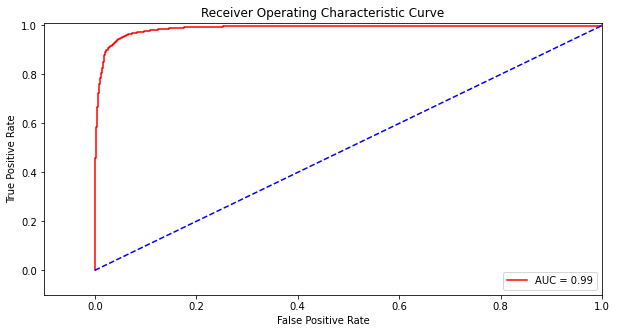

In [57]:
# Plottting the ROC Curve and checking the Area Under the Curve value
fpr, tpr, threshold = roc_curve(y_test, y_pred_lr_prob[:,1])
roc_auc = auc(fpr,tpr)
plt.figure(figsize=[10,5])
plt.title('Receiver Operating Characteristic Curve')
plt.plot(fpr, tpr, 'r',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### **4. Random Forest**

The Random Forest is an ensemble method, which uses a collection of a large number of decision trees to make predictions instead of individual models. The individual models must make predictions which are independent of each other and each individual model should be better than a random classifier. 

Advantages:

* Helpful in reducing overfitting in decision trees and drastically improving accuracy. 
* Efficient in handling missing values and robust to outliers. 
* Works well with large input training sets. 

Disadvantages:

* Results from a random forest cannot be displayed in a tree-like diagram, thereby losing interpretability.
* Higher Computation time and complexity during training as multiple trees are generated. 



In [58]:
# Creating the object of the base Random Forest Classifier model
random_forest_classifier = RandomForestClassifier(random_state=0)

# Fitting the base Random Forest Classifier model
random_forest_classifier = random_forest_classifier.fit(X_train, y_train)

In [59]:
# Making the prediction on the test set
y_pred_rf = random_forest_classifier.predict(X_test)


df_phishing_rf_classification = pd.DataFrame(columns=['Accuracy', 'Validation Error'])

# Evaluating the predictive performance of the model using different metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
validation_error_rf = 1-accuracy_score(y_test, y_pred_rf)

df_phishing_rf_classification.loc[0] = [accuracy_rf,validation_error_rf]

print("\nEvaluation Metrics:")
print(tabulate(df_phishing_rf_classification, headers='keys', tablefmt='grid'))  


Evaluation Metrics:
+----+------------+--------------------+
|    |   Accuracy |   Validation Error |
+====+============+====================+
|  0 |   0.975821 |          0.0241785 |
+----+------------+--------------------+


### Tuning the hyperparameters of the Random Forest Model

Maximum Accuracy:

+----+-------------+------------+
|    |   max_depth |   Accuracy |
+====+=============+============+
| 29 |          29 |    0.97575 |
+----+-------------+------------+

Evaluation Metrics:

+----+-------------+------------+
|    |   max_depth |   Accuracy |
+====+=============+============+
|  1 |           1 |   0.854642 |
+----+-------------+------------+
|  2 |           2 |   0.921294 |
+----+-------------+------------+
|  3 |           3 |   0.927823 |
+----+-------------+------------+
|  4 |           4 |   0.93672  |
+----+-------------+------------+
|  5 |           5 |   0.946119 |
+----+-------------+------------+
|  6 |           6 |   0.954872 |
+----+-------------+------------+
|  7 |           7 |   0.957741 |
+----+-------------+------------+
|  8 |           8 |   0.960611 |
+----+-------------+------------+
|  9 |           9 |   0.963194 |
+----+-------------+------------+
| 10 |          10 |   0.965562 |
+----+-------------+------------+
| 11 | 

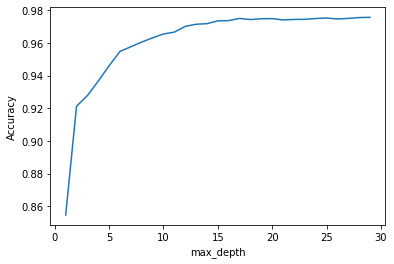

In [60]:
# Creating an empty dataframe to display evaluation metrics
df_rf_tuned = pd.DataFrame(columns=['max_depth', 'Accuracy'])

# Iterating 30 times to vary the max_depth of the Random Forest classifier
for i in range(1,30):
    rf_model = RandomForestClassifier(max_depth = i, random_state=0)

    # Fiting the Random Forest classifier
    rf_model.fit(X_train,y_train)

    # Predicting the output using the test set
    rf_pred = rf_model.predict(X_test)
   

    # Evaluating the accuracy of the model
    accuracy = accuracy_score(y_test,rf_pred)
    df_rf_tuned.loc[i] = [i, accuracy]


print("Maximum Accuracy:\n")
print(tabulate(df_rf_tuned[df_rf_tuned['Accuracy']==df_rf_tuned['Accuracy'].max()], headers='keys', tablefmt='grid'))
print("\nEvaluation Metrics:\n")
print(tabulate(df_rf_tuned, headers='keys', tablefmt='grid'))
sns.lineplot(x='max_depth', y='Accuracy', data=df_rf_tuned)
plt.show()

### Optimizing the estimators for the Random Forest Model

Highest Overall Accuracy:
+----+--------------+------------+
|    |   estimators |   Accuracy |
+====+==============+============+
| 89 |           89 |   0.976108 |
+----+--------------+------------+
Evaluation Metrics:
+----+--------------+------------+
|    |   estimators |   Accuracy |
+====+==============+============+
|  1 |            1 |   0.947553 |
+----+--------------+------------+
|  2 |            2 |   0.947051 |
+----+--------------+------------+
|  3 |            3 |   0.963696 |
+----+--------------+------------+
|  4 |            4 |   0.962261 |
+----+--------------+------------+
|  5 |            5 |   0.967499 |
+----+--------------+------------+
|  6 |            6 |   0.96714  |
+----+--------------+------------+
|  7 |            7 |   0.96958  |
+----+--------------+------------+
|  8 |            8 |   0.969938 |
+----+--------------+------------+
|  9 |            9 |   0.970799 |
+----+--------------+------------+
| 10 |           10 |   0.97123  |
+----+---

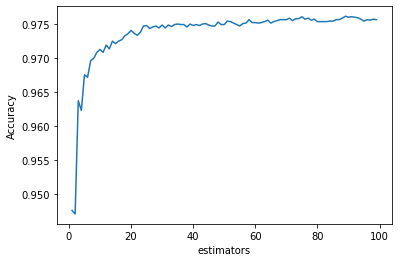

In [61]:
# Creating an empty dataframe to display evaluation metrics
df_rf_estimators = pd.DataFrame(columns=['estimators', 'Accuracy'])

# Iterating 100 times to vary the number of estimators of the Random Forest classifier
for i in range(1,100):

  rf_model = RandomForestClassifier(max_depth = 29, n_estimators = i, random_state = 0)

  # Fiting the Random Forest classifier
  rf_model.fit(X_train,y_train)

  # Predicting the output using the test set
  rf_pred = rf_model.predict(X_test)
  y_pred_prob_rf = rf_model.predict_proba(X_test)
  
  # Evaluating the accuracy of the model
  accuracy = accuracy_score(y_test,rf_pred)
  df_rf_estimators.loc[i] = [i, accuracy]  

print("Highest Overall Accuracy:")
print(tabulate(df_rf_estimators[df_rf_estimators['Accuracy'] == df_rf_estimators['Accuracy'].max()], headers='keys', tablefmt='grid'))
print("Evaluation Metrics:")
print(tabulate(df_rf_estimators, headers='keys', tablefmt='grid'))
sns.lineplot(x='estimators', y='Accuracy', data=df_rf_estimators)

In [62]:
# Creating the object of the Random Forest Classifier model using the tuned hyperparamters
rf_classifier = RandomForestClassifier(max_depth=29,n_estimators=89,random_state=0)

# Fitting the base Random Forest Classifier model
rf_classifier = rf_classifier.fit(X_train, y_train)

In [63]:
# Making the prediction on the test set
y_pred_rf = rf_classifier.predict(X_test)

df_phishing_rf_classifier = pd.DataFrame(columns=['Accuracy', 'Validation Error'])

# Evaluating the predictive performance of the model using different metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
validation_error_rf = 1-accuracy_score(y_test, y_pred_rf)

df_phishing_rf_classifier.loc[0] = [accuracy_rf,validation_error_rf]

print("\nEvaluation Metrics:")
print(tabulate(df_phishing_rf_classifier, headers='keys', tablefmt='grid'))  


Evaluation Metrics:
+----+------------+--------------------+
|    |   Accuracy |   Validation Error |
+====+============+====================+
|  0 |   0.976108 |          0.0238915 |
+----+------------+--------------------+


In [64]:
# Evaluating performance using classification Metrics 

df_phishing_classification_rf = pd.DataFrame(columns = ['Overall Accuracy','Validation Error', 'Sensitivity','Specificity','F-1 Score'])
if(len(y_test) == len(y_pred_rf)):
                  if((np.isin(y_test,[0,1]).all()) and (np.isin(y_pred_rf,[0,1]).all())):
                      tp = 0 # predicted = actual = 1
                      fn = 0 # predicted = 0; actual = 1
                      fp = 0 # predicted = 1; actual = 0
                      tn = 0 # predicted = actual = 0                     
                      
                      for actual_val, predicted_val in zip(y_test,y_pred_rf):
                          if predicted_val == actual_val:  # if the predicted value is equal to actual value and equal to 1 (TP)
                              if predicted_val == 1: 
                                tp = tp + 1
                              else: # else if the predicted value is equal to actual value and equal to 0 (TN)
                                tn = tn + 1
                          else: # if the predicted value is not equal to actual value(pred=1, actual=0) (FP)
                              if predicted_val == 1:
                                fp = fp + 1
                              else: # else if the predicted value is not equal to actual value(pred=0, actual=1) (FN)
                                fn = fn + 1
                      
                      # Computing the different performance evaluation metrics based on values derived above
                      confusion_matrix_rf = np.array([[tp, fn],
                                                      [fp, tn]])
                      df_confusion_matrix_rf = pd.DataFrame(confusion_matrix_rf, columns =['Predicted(phishing-1)', 'Predicted(legitimate-0)'], index = ['Actual(phishing-1)', 'Actual(legitimate-0)'])   
 
                  

                      overall_accuracy_rf = (tp+tn)/(tn+fp+fn+tp)
                      validation_error_rf = (fp+fn)/(tn+fp+fn+tp)
                      sensitivity_rf= tp/(fn+tp) 
                      specificity_rf = tn/(fp+tn) 
                      f1_score_rf = (2*tp)/((2*tp)+fp+fn)

                      df_phishing_classification_rf.loc[0] = [overall_accuracy_rf,validation_error_rf,sensitivity_rf,specificity_rf,f1_score_rf]

print("Original Confusion Matrix:\n")
print(tabulate(df_confusion_matrix_rf, headers='keys', tablefmt='grid'))  

print("\nEvaluation Metrics:\n")
print(tabulate(df_phishing_classification_rf, headers='keys', tablefmt='grid'))  

Original Confusion Matrix:

+----------------------+-------------------------+---------------------------+
|                      |   Predicted(phishing-1) |   Predicted(legitimate-0) |
+======================+=========================+===========================+
| Actual(phishing-1)   |                    3719 |                       177 |
+----------------------+-------------------------+---------------------------+
| Actual(legitimate-0) |                     156 |                      9886 |
+----------------------+-------------------------+---------------------------+

Evaluation Metrics:

+----+--------------------+--------------------+---------------+---------------+-------------+
|    |   Overall Accuracy |   Validation Error |   Sensitivity |   Specificity |   F-1 Score |
+====+====================+====================+===============+===============+=============+
|  0 |           0.976108 |          0.0238915 |      0.954569 |      0.984465 |    0.957148 |
+----+-----------

                  Features  Feature importances
3            qty_slash_url             0.308263
14              length_url             0.210358
23  time_domain_activation             0.142845
15          qty_dot_domain             0.075056
24  time_domain_expiration             0.029487
0              qty_dot_url             0.027182
1           qty_hyphen_url             0.026087
21           time_response             0.024901
18           domain_length             0.023912
17       qty_vowels_domain             0.015618
27          qty_mx_servers             0.014651
2        qty_underline_url             0.014575
6              qty_and_url             0.013537
26         qty_nameservers             0.011562
28     tls_ssl_certificate             0.009898
22              domain_spf             0.009519
29           qty_redirects             0.008743
25         qty_ip_resolved             0.008487
13             qty_tld_url             0.006482
32           url_shortened             0

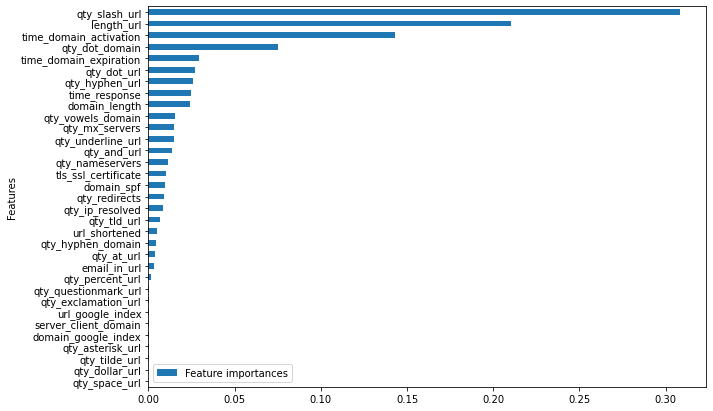

In [65]:
# Important contributors of the best model - Random Forest Classifier  
df=pd.DataFrame({'Features': X_train.columns,'Feature importances':rf_classifier.feature_importances_})
df.sort_values('Feature importances',inplace=True)
print(df.sort_values(by='Feature importances', ascending=False),"\n")
df.plot(kind='barh',y='Feature importances',x='Features', figsize=(10,7))

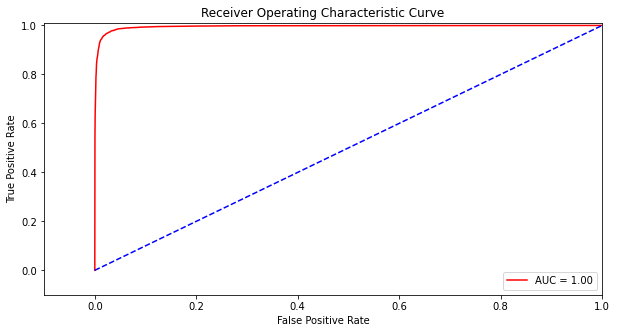

In [66]:
# Plottting the ROC Curve and checking the Area Under the Curve value
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob_rf[:,1])
roc_auc = auc(fpr,tpr)
plt.figure(figsize=[10,5])
plt.title('Receiver Operating Characteristic Curve')
plt.plot(fpr, tpr, 'r',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### **5.Neural Network**

Neural networks are models which may be used for a classification or prediction problem. Some complex neural network models can also be used for feature extraction. The neural network model mimics the neurons present in human brains, as they have properties that resemble learning and memory based on experience. 

Advantages:

* Results in a good predictive performance 
* Can tolerate noisy data 
* Capable of capturing highly complicated relationships between predictors and target variable.  

Disadvantages:

* Computationally expensive as they require longer runtime for training, which increases as the number of predictors increase
* The structure of the model lacks interpretability. 
* Prone to overfitting. 

In [67]:
# Creating the object of the base Neural Network Classifier model
neural_network_classifier = MLPClassifier(random_state=0)

# Fitting the base Neural Network Classifier model
neural_network_classifier = neural_network_classifier.fit(X_train, y_train)

In [68]:
# Making the prediction on the test set
y_pred_nn = neural_network_classifier.predict(X_test)

df_phishing_nn_classification = pd.DataFrame(columns=['Accuracy', 'Validation Error'])

# Evaluating the predictive performance of the model using different metrics
accuracy_nn = accuracy_score(y_test, y_pred_nn)
validation_error_nn = 1-accuracy_score(y_test, y_pred_nn)

df_phishing_nn_classification.loc[0] = [accuracy_nn,validation_error_nn]

print("\nEvaluation Metrics:")
print(tabulate(df_phishing_nn_classification, headers='keys', tablefmt='grid'))  


Evaluation Metrics:
+----+------------+--------------------+
|    |   Accuracy |   Validation Error |
+====+============+====================+
|  0 |   0.969077 |          0.0309227 |
+----+------------+--------------------+


### Tuning the hyperparameters of the Neural Network Model

Maximum Accuracy:

+----+-----------------+---------------------+------------+--------------------+
|    |   Learning Rate | Transfer Function   |   Accuracy |   Validation Error |
+====+=================+=====================+============+====================+
| 12 |           0.001 | relu                |   0.969077 |          0.0309227 |
+----+-----------------+---------------------+------------+--------------------+

Evaluation Metrics:

+----+-----------------+---------------------+------------+--------------------+
|    |   Learning Rate | Transfer Function   |   Accuracy |   Validation Error |
+====+=================+=====================+============+====================+
|  1 |          1e-05  | identity            |   0.954298 |          0.0457024 |
+----+-----------------+---------------------+------------+--------------------+
|  2 |          1e-05  | logistic            |   0.950423 |          0.0495767 |
+----+-----------------+---------------------+------------+---------

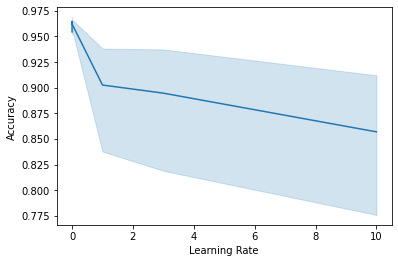

In [69]:
# Creating an empty dataframe to display evaluation metrics
df_NN = pd.DataFrame(columns=['Learning Rate','Transfer Function', 'Accuracy', 'Validation Error'])

#Defining the learning rate
lr = [0.00001, 0.0001, 0.001, 0.003, 0.01, 0.03, 1, 3, 10]

# Defining the different activation function
transfer_function = ['identity', 'logistic', 'tanh', 'relu']

index = 1

# Iterating through the different activation functions
for i in lr:
  for j in transfer_function:

        # Creating the instance for the Neural Nets Classification model
        model = MLPClassifier(learning_rate_init= i, activation=j,random_state=0)

        # Fitting the model
        model.fit(X_train, y_train)

        # Making prediction on the test set 
        pred = model.predict(X_test)

        # Evaluating the predictive performance of the model using different metrics
        accuracy_nn = accuracy_score(y_test, pred)
        validation_error = 1-accuracy_score(y_test, pred)


        df_NN.loc[index] = [i,j, accuracy_nn,validation_error]
        index+=1
      
      
# Displaying the final dataframe to select the best value to train the model  
print("Maximum Accuracy:\n")
print(tabulate(df_NN[df_NN['Accuracy']==df_NN['Accuracy'].max()], headers='keys', tablefmt='grid'))
print("\nEvaluation Metrics:\n")
print(tabulate(df_NN, headers='keys', tablefmt='grid'))
sns.lineplot(x='Learning Rate', y='Accuracy', data=df_NN)
plt.show()

Training the model with the best hyperparameters obtained

In [70]:
# Creating an empty dataframe to store the performance evaluation metrics
df_phishing_NN_classification = pd.DataFrame(columns = ['Overall Accuracy','Validation Error', 'Sensitivity', 'Specificity','F-1 Score'])


# Creating the instance for the NN Classification model with k=
nn_classifier = MLPClassifier(learning_rate_init= 0.001, activation='relu', random_state=0)

# Fitting the NN Classifier
nn_classifier.fit(X_train,y_train)

# Making prediction on the test set 
y_pred_nn = nn_classifier.predict(X_test)
y_pred_prob_nn =  nn_classifier.predict_proba(X_test)

# Evaluating the predictive performance of the model using different metrics
if(len(y_test) == len(y_pred_nn)):
                  if((np.isin(y_test,[0,1]).all()) and (np.isin(y_pred_nn,[0,1]).all())):
                      tp = 0 # predicted = actual = 1
                      fn = 0 # predicted = 0; actual = 1
                      fp = 0 # predicted = 1; actual = 0
                      tn = 0 # predicted = actual = 0                     
                      
                      for actual_val, predicted_val in zip(y_test,y_pred_nn):
                          if predicted_val == actual_val:  # if the predicted value is equal to actual value and equal to 1 (TP)
                              if predicted_val == 0: 
                                tp = tp + 1
                              else: # else if the predicted value is equal to actual value and equal to 0 (TN)
                                tn = tn + 1
                          else: # if the predicted value is not equal to actual value(pred=1, actual=0) (FP)
                              if predicted_val == 0:
                                fp = fp + 1
                              else: # else if the predicted value is not equal to actual value(pred=0, actual=1) (FN)
                                fn = fn + 1
                      
                      # Computing the different performance evaluation metrics based on values derived above

                      # Confusion matrix
                      confusion_matrix_nn = np.array([[tp, fn],
                                                       [fp, tn]])
                      df_confusion_matrix = pd.DataFrame(confusion_matrix_nn, columns =['Predicted(phishing-1)', 'Predicted(legitimate-0)'], index = ['Actual(phishing-1)', 'Actual(legitimate-0)'])   
                      
                      # Overall Accuracy
                      overall_accuracy = (tp+tn)/(tn+fp+fn+tp)

                      # Missclassification Error
                      validation_error = (fp+fn)/(tn+fp+fn+tp)

                      # Sensitivity
                      sensitivity = tp/(fn+tp) 

                      # Specificity
                      specificity = tn/(fp+tn) 

                      # F-1 Score
                      f1_score = (2*tp)/((2*tp)+fp+fn)

                      df_phishing_NN_classification.loc[0] = [overall_accuracy,validation_error,sensitivity,specificity,f1_score]

# Displaying the final confusion matrix and results obtained from the different evaluation metrics 
print("Original Confusion Matrix:")
print(tabulate(df_confusion_matrix, headers='keys', tablefmt='grid'))  

print("\nEvaluation Metrics:")
print(tabulate(df_phishing_NN_classification, headers='keys', tablefmt='grid'))  

Original Confusion Matrix:
+----------------------+-------------------------+---------------------------+
|                      |   Predicted(phishing-1) |   Predicted(legitimate-0) |
+======================+=========================+===========================+
| Actual(phishing-1)   |                    9802 |                       240 |
+----------------------+-------------------------+---------------------------+
| Actual(legitimate-0) |                     191 |                      3705 |
+----------------------+-------------------------+---------------------------+

Evaluation Metrics:
+----+--------------------+--------------------+---------------+---------------+-------------+
|    |   Overall Accuracy |   Validation Error |   Sensitivity |   Specificity |   F-1 Score |
+====+====================+====================+===============+===============+=============+
|  0 |           0.969077 |          0.0309227 |        0.9761 |      0.950975 |    0.978488 |
+----+-------------

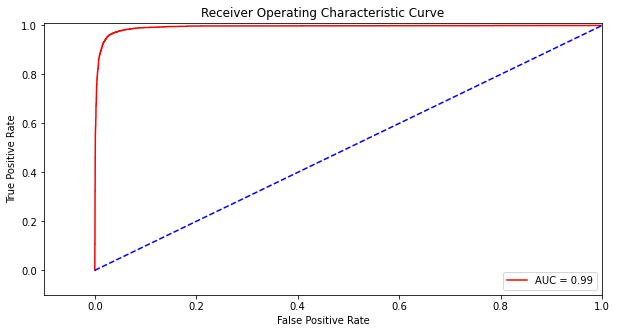

In [71]:
# Plottting the ROC Curve and checking the Area Under the Curve value
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob_nn[:,1],)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=[10,5])
plt.title('Receiver Operating Characteristic Curve')
plt.plot(fpr, tpr, 'r',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### **Final Results**

From the below table, we infer the following points:

1. The Random Forest model has the highest overall accuracy of 97.61% and lowest validation error of 2.39% in classification of phishing and legitimate website instances. It also has the highest F-1 score of 95.71%. It has the highest sensitivity value of 95.46%, which implies that the Random Forest Classifier is the best model among the other models in classifying the True Positives, which in this case are the phishing instances. The best contributors have been evaluated using the feature importance scores, as shown in Fig. 

2. The Neural Network Classifier is the next best classifier in terms of accuracy with a value 96.91%. It has a high Sensitivity value of 97.61%, which implies that it can classify the True Positives, or phishing instances correctly.Additionally, it has the highest F-1 score of 97.85%.

3. The Decision tree is the next best classifier in terms of accuracy with a value 96.46%. It has a Sensitivity value of 92.99%. It has a high Specificity value of 97.79%, which implies that it can classify the True Negatives, or legitimate instances correctly.

4. The k-NN classifier has a high accuracy value of 96.46%, which is the same as that of the Decision tree. However, comparatively it has a lower Sensitivity value of 91.71%, therefore it has been ranked below Decision Tree for this application. It has a high specificity of 98.29%, implying that it is a good classifier for classifying legitimate instances. 

5. The Logistic Regression classifier has a good overall accuracy of 95.47%, however it is the lowest compared to other models. It has a better Sensitivity value of 90.14%.

In [72]:
# Representing all metrics as a DataFrame for comparison
df_classification_models = pd.DataFrame( {'Classification Models':['Random Forest', 'Neural Networks','Decision Tree','k-NN Classifier', 'Logistic Regression'],     
                                          'Model Inputs': [rf_classifier, nn_classifier,dt_classifier, knn_classifier,lr_classifier],                               
                                          'Performance Evaluation Metrics': [df_phishing_classification_rf.loc[0], df_phishing_NN_classification.loc[0], df_phishing_classification_tree.loc[0],df_phishing_kNN_classification.loc[0],df_phishing_lr_classifier.loc[0]]                                      
                                          }, columns=['Classification Models','Model Inputs','Performance Evaluation Metrics'], index=[1,2,3,4,5])

print(tabulate(df_classification_models, headers='keys', tablefmt='grid'))

+----+-------------------------+---------------------------------------------------------------------------------+----------------------------------+
|    | Classification Models   | Model Inputs                                                                    | Performance Evaluation Metrics   |
+====+=========================+=================================================================================+==================================+
|  1 | Random Forest           | RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,        | Overall Accuracy    0.976108     |
|    |                         |                        criterion='gini', max_depth=29, max_features='auto',     | Validation Error    0.023892     |
|    |                         |                        max_leaf_nodes=None, max_samples=None,                   | Sensitivity         0.954569     |
|    |                         |                        min_impurity_decrease=0.0, min_impurity_spli

From the below results, it is evident that these classification models exhibit low training and low test error. This implies that these models do not underfit or overfit the data. Hence, they can be used for classification of phishing and legitimate website instances. 

`The Random Forest classifier however, outperforms the remaining classifiers due to its high overall accuracy, low misclassification error, high sensitivity, high specificity and high F-1 score.`

In [82]:
# Evaluating the training and test error of the different Classification Models to check for overfitting 
model_names=['Random Forest', 'Neural Networks','Decision Tree','k-NN Classifier','Logistic Regression']

df_errors = pd.DataFrame(columns=['Classification Model', 'Training Error', 'Test error'])

# Computing the training error for each classifier
y_pred_knn = knn_classifier.predict(X_train)
y_pred_dt = dt_classifier.predict(X_train)
y_pred_lr = lr_classifier.predict(X_train)
y_pred_rf = rf_classifier.predict(X_train)
y_pred_nn = nn_classifier.predict(X_train)


# Computing the test error for each classifier
y_pred_knn_2 = knn_classifier.predict(X_test)
y_pred_dt_2 = dt_classifier.predict(X_test)
y_pred_lr_2 = lr_classifier.predict(X_test)
y_pred_rf_2 = rf_classifier.predict(X_test)
y_pred_nn_2 = nn_classifier.predict(X_test)

training_predictions = [y_pred_rf, y_pred_nn,y_pred_dt,y_pred_knn,y_pred_lr]
test_predictions = [y_pred_rf_2,y_pred_nn_2,y_pred_dt_2,y_pred_knn_2,y_pred_lr_2]
k = 1
for x,y,z in zip(training_predictions, test_predictions, model_names):
    training_error = 1-accuracy_score(y_train,x)
    test_error = 1-accuracy_score(y_test,y)
    df_errors.loc[k] = [z, training_error, test_error]
    k=k+1


print(tabulate(df_errors, headers='keys', tablefmt='grid'))

+----+------------------------+------------------+--------------+
|    | Classification Model   |   Training Error |   Test error |
+====+========================+==================+==============+
|  1 | Random Forest          |        0         |    0.0238915 |
+----+------------------------+------------------+--------------+
|  2 | Neural Networks        |        0.0144526 |    0.0309227 |
+----+------------------------+------------------+--------------+
|  3 | Decision Tree          |        0.0149446 |    0.0354427 |
+----+------------------------+------------------+--------------+
|  4 | k-NN Classifier        |        0         |    0.0354427 |
+----+------------------------+------------------+--------------+
|  5 | Logistic Regression    |        0.045449  |    0.0452719 |
+----+------------------------+------------------+--------------+
